In [1]:
!pip install catboost

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

c:\Users\DIPEN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\DIPEN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dipu20/heart-disease/refs/heads/main/Framingham%20Dataset.csv?token=GHSAT0AAAAAADNGOW5PK5MNFLYQE3XUQEUI2HPP4MA')
pd.set_option('display.max_columns', None)
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [4]:
df.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,11034.000000,11621.000000,10187.000000,11332.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,3027.000000,3026.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,0.085554,76.781516,84.124865,1.990205,0.072418,0.053926,0.032167,0.013073,0.459620,1957.019438,1.899286,49.364718,176.466953,0.303346,0.163585,0.099252,0.153780,0.271609,0.091253,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,0.279717,12.463359,24.993781,1.027463,0.259189,0.225882,0.176450,0.113592,0.498388,1758.776927,0.807407,15.626669,46.863393,0.459723,0.369914,0.299013,0.360753,0.444809,0.287981,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,0.000000,37.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,0.000000,69.000000,72.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000,145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,0.000000,75.000000,80.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156.000000,2.000000,48.000000,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,0.000000,85.000000,89.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4252.500000,3.000000,58.000000,205.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,1.000000,220.000000,478.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4854.000000,3.000000,189.000000,565.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [8]:
df.isnull().sum()

RANDID        0
SEX           0
TOTCHOL       0
AGE           0
SYSBP         0
DIABP         0
CURSMOKE      0
CIGPDAY      79
BMI           0
DIABETES      0
BPMEDS        0
HEARTRTE      6
GLUCOSE       0
educ        295
PREVCHD       0
PREVAP        0
PREVMI        0
PREVSTRK      0
PREVHYP       0
TIME          0
PERIOD        0
HDLC          0
LDLC          0
DEATH         0
ANGINA        0
HOSPMI        0
MI_FCHD       0
ANYCHD        0
STROKE        0
CVD           0
HYPERTEN      0
TIMEAP        0
TIMEMI        0
TIMEMIFC      0
TIMECHD       0
TIMESTRK      0
TIMECVD       0
TIMEDTH       0
TIMEHYP       0
dtype: int64

In [9]:
df.rename(columns={'CURSMOKE': 'CURRENT SMOKER', 'CIGPDAY': 'CIGS PER DAY', 'HEARTRTE': 'HEARTRATE', 'educ': 'EDUCATION', 'PREVSTRK': 'PREVALENT STROKE', 'PREVHYP': 'PREVALENTHYP'}, inplace=True)

In [10]:
df.isnull().sum()

RANDID                0
SEX                   0
TOTCHOL               0
AGE                   0
SYSBP                 0
DIABP                 0
CURRENT SMOKER        0
CIGS PER DAY         79
BMI                   0
DIABETES              0
BPMEDS                0
HEARTRATE             6
GLUCOSE               0
EDUCATION           295
PREVCHD               0
PREVAP                0
PREVMI                0
PREVALENT STROKE      0
PREVALENTHYP          0
TIME                  0
PERIOD                0
HDLC                  0
LDLC                  0
DEATH                 0
ANGINA                0
HOSPMI                0
MI_FCHD               0
ANYCHD                0
STROKE                0
CVD                   0
HYPERTEN              0
TIMEAP                0
TIMEMI                0
TIMEMIFC              0
TIMECHD               0
TIMESTRK              0
TIMECVD               0
TIMEDTH               0
TIMEHYP               0
dtype: int64

In [11]:
df.fillna({'TOTCHOL':0},inplace=True)
df.fillna({'CIGS PER DAY':0},inplace=True)
df.fillna({'BPMEDS':0},inplace=True)
df.fillna({'EDUCATION':0},inplace=True)
df.fillna({'BMI':0},inplace=True)
df.fillna({'HEARTRATE':0},inplace=True)
df.fillna({'GLUCOSE':0},inplace=True)
df.fillna({'HDLC':0},inplace=True)
df.fillna({'LDLC':0},inplace=True)

In [12]:
df.isnull().sum()

RANDID              0
SEX                 0
TOTCHOL             0
AGE                 0
SYSBP               0
DIABP               0
CURRENT SMOKER      0
CIGS PER DAY        0
BMI                 0
DIABETES            0
BPMEDS              0
HEARTRATE           0
GLUCOSE             0
EDUCATION           0
PREVCHD             0
PREVAP              0
PREVMI              0
PREVALENT STROKE    0
PREVALENTHYP        0
TIME                0
PERIOD              0
HDLC                0
LDLC                0
DEATH               0
ANGINA              0
HOSPMI              0
MI_FCHD             0
ANYCHD              0
STROKE              0
CVD                 0
HYPERTEN            0
TIMEAP              0
TIMEMI              0
TIMEMIFC            0
TIMECHD             0
TIMESTRK            0
TIMECVD             0
TIMEDTH             0
TIMEHYP             0
dtype: int64

array([[<AxesSubplot:title={'center':'RANDID'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'TOTCHOL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SYSBP'}>,
        <AxesSubplot:title={'center':'DIABP'}>],
       [<AxesSubplot:title={'center':'CURRENT SMOKER'}>,
        <AxesSubplot:title={'center':'CIGS PER DAY'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DIABETES'}>,
        <AxesSubplot:title={'center':'BPMEDS'}>,
        <AxesSubplot:title={'center':'HEARTRATE'}>],
       [<AxesSubplot:title={'center':'GLUCOSE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PREVCHD'}>,
        <AxesSubplot:title={'center':'PREVAP'}>,
        <AxesSubplot:title={'center':'PREVMI'}>,
        <AxesSubplot:title={'center':'PREVALENT STROKE'}>],
       [<AxesSubplot:title={'center':'PREVALENTHYP'}>,
        <AxesSubplot:title={'center'

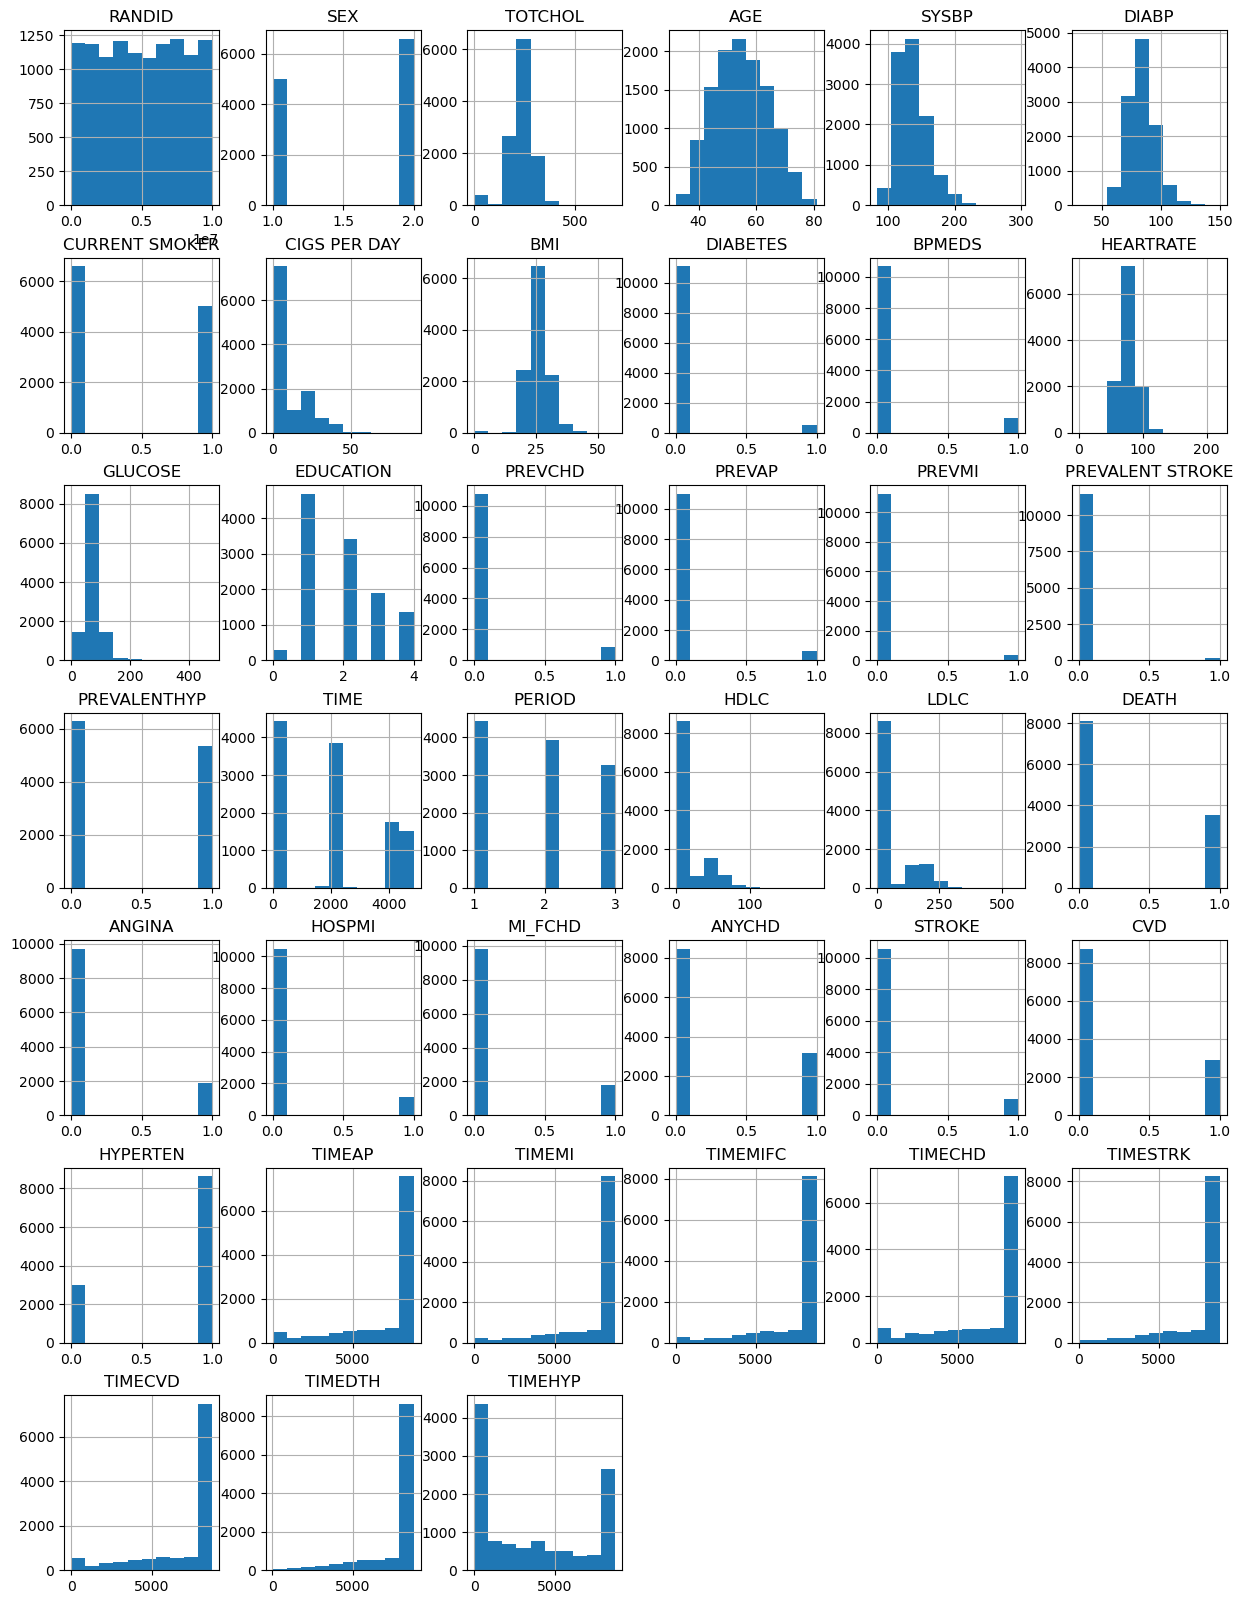

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

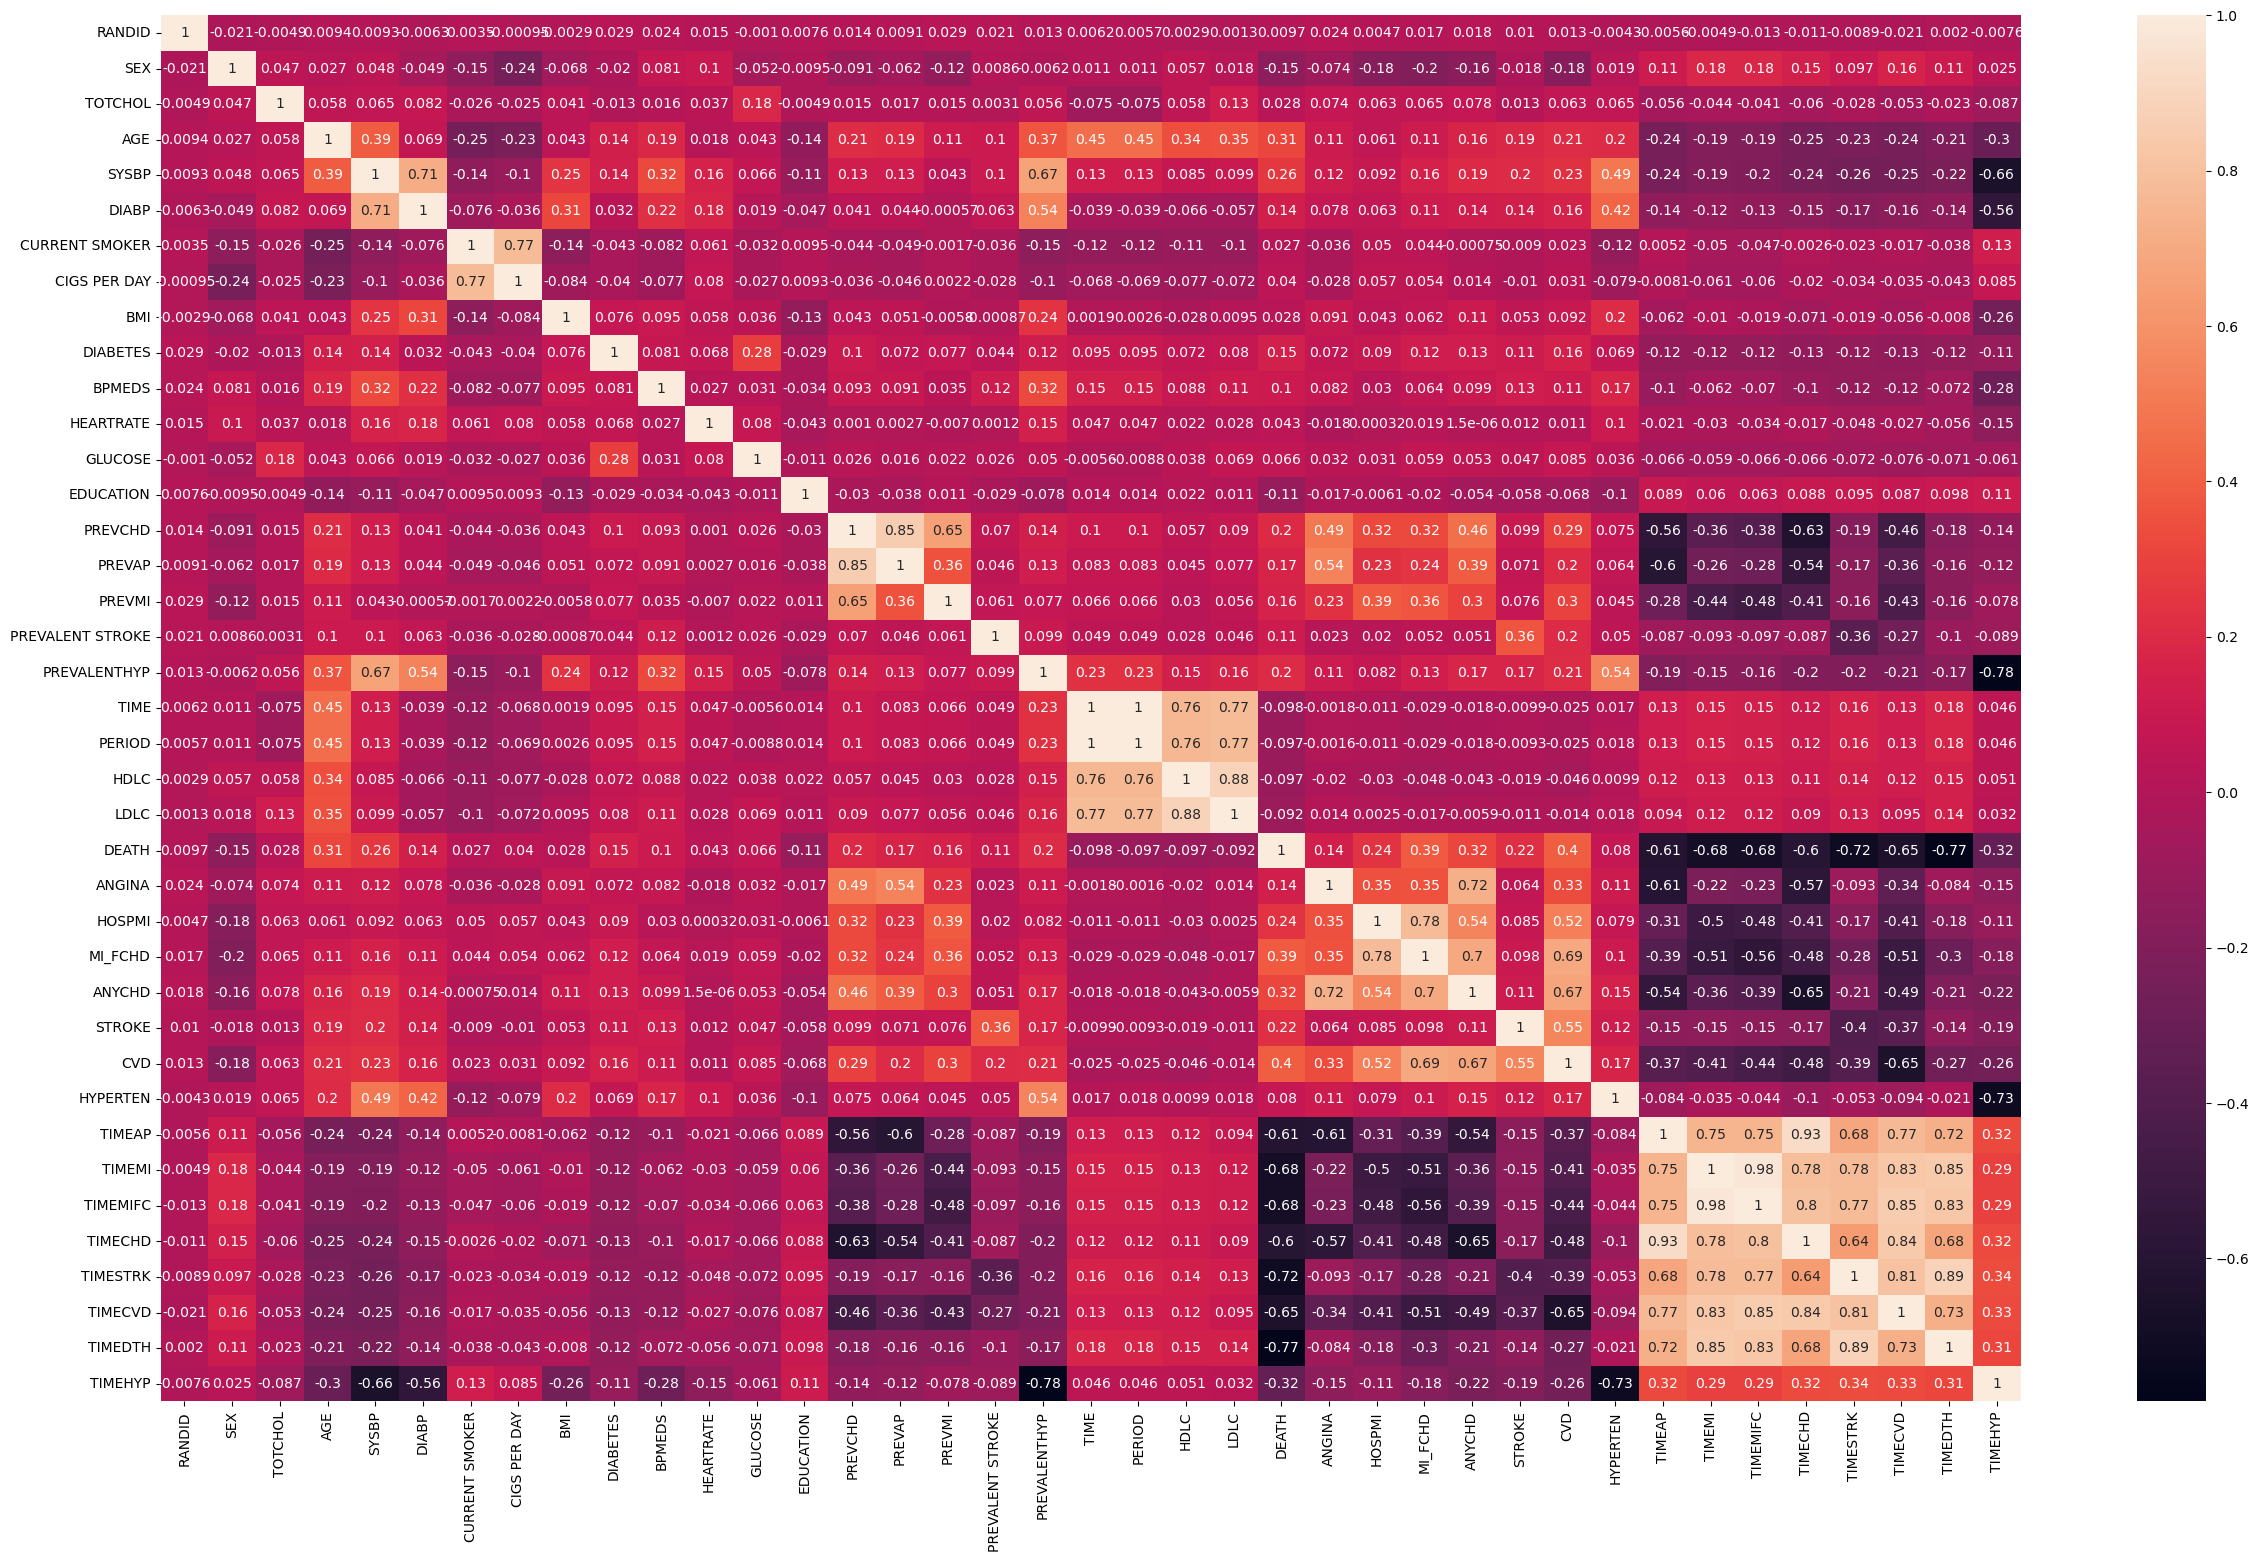

In [20]:
plt.figure(figsize = (30,18))
sns.heatmap(df.corr(),annot =True)
plt.show()

In [15]:
df.nunique()

RANDID              4434
SEX                    2
TOTCHOL              300
AGE                   50
SYSBP                260
DIABP                160
CURRENT SMOKER         2
CIGS PER DAY          45
BMI                 1819
DIABETES               2
BPMEDS                 2
HEARTRATE             84
GLUCOSE              212
EDUCATION              5
PREVCHD                2
PREVAP                 2
PREVMI                 2
PREVALENT STROKE       2
PREVALENTHYP           2
TIME                 932
PERIOD                 3
HDLC                 106
LDLC                 263
DEATH                  2
ANGINA                 2
HOSPMI                 2
MI_FCHD                2
ANYCHD                 2
STROKE                 2
CVD                    2
HYPERTEN               2
TIMEAP              1606
TIMEMI              1529
TIMEMIFC            1543
TIMECHD             1716
TIMESTRK            1525
TIMECVD             1634
TIMEDTH             1419
TIMEHYP             1519
dtype: int64

In [16]:
df.dtypes

RANDID                int64
SEX                   int64
TOTCHOL             float64
AGE                   int64
SYSBP               float64
DIABP               float64
CURRENT SMOKER        int64
CIGS PER DAY        float64
BMI                 float64
DIABETES              int64
BPMEDS              float64
HEARTRATE           float64
GLUCOSE             float64
EDUCATION           float64
PREVCHD               int64
PREVAP                int64
PREVMI                int64
PREVALENT STROKE      int64
PREVALENTHYP          int64
TIME                  int64
PERIOD                int64
HDLC                float64
LDLC                float64
DEATH                 int64
ANGINA                int64
HOSPMI                int64
MI_FCHD               int64
ANYCHD                int64
STROKE                int64
CVD                   int64
HYPERTEN              int64
TIMEAP                int64
TIMEMI                int64
TIMEMIFC              int64
TIMECHD               int64
TIMESTRK            

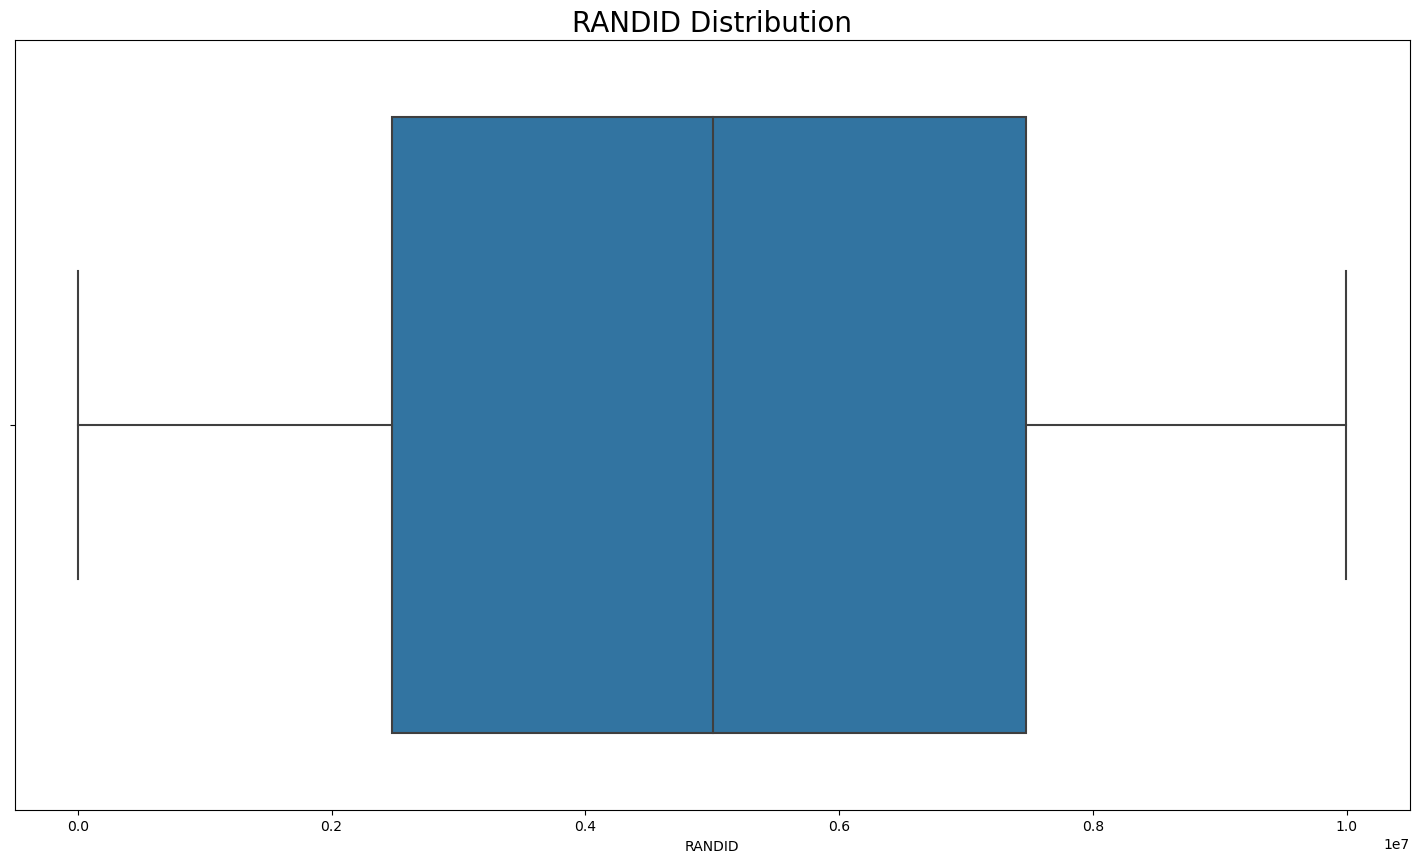

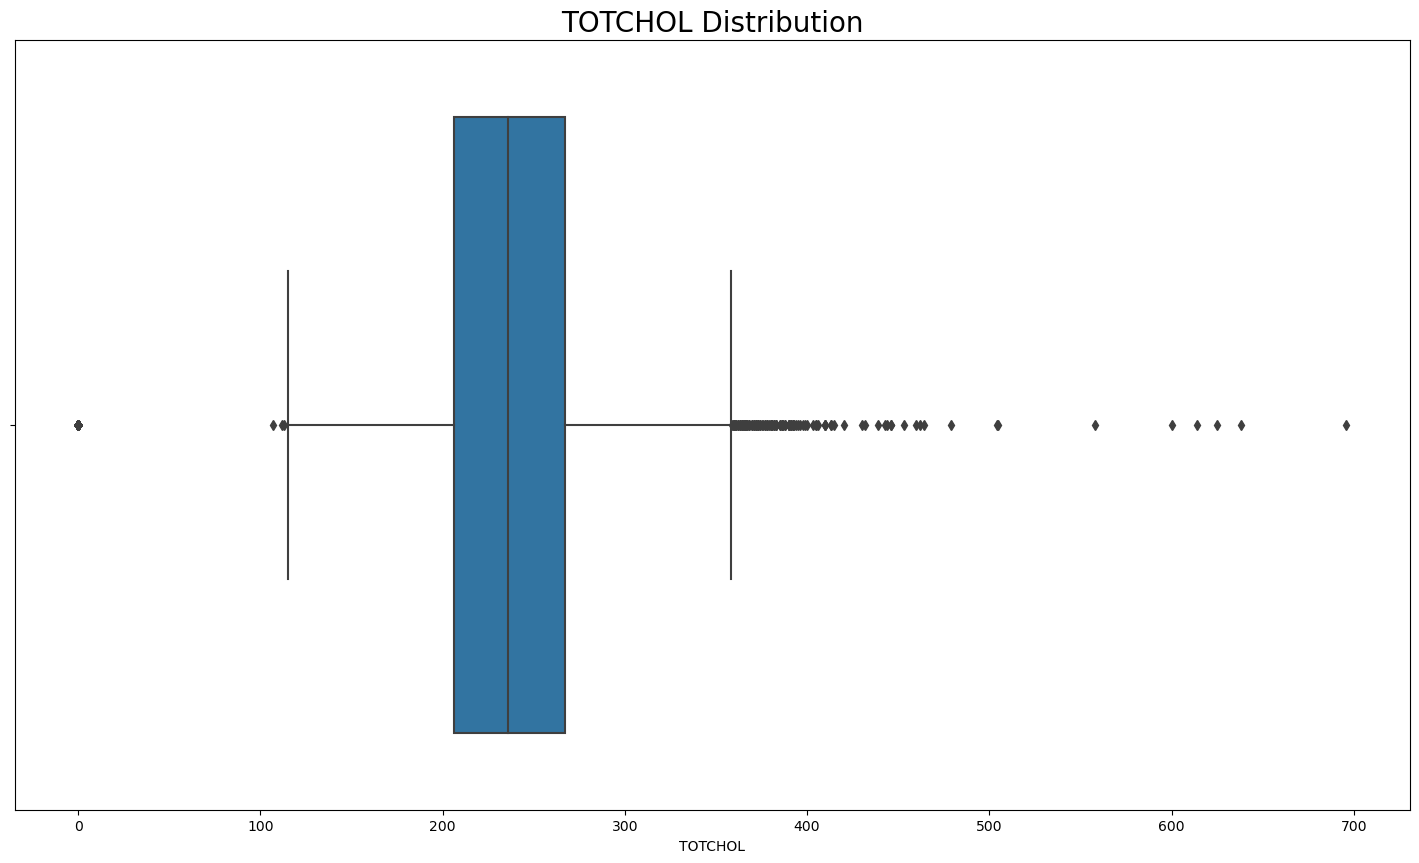

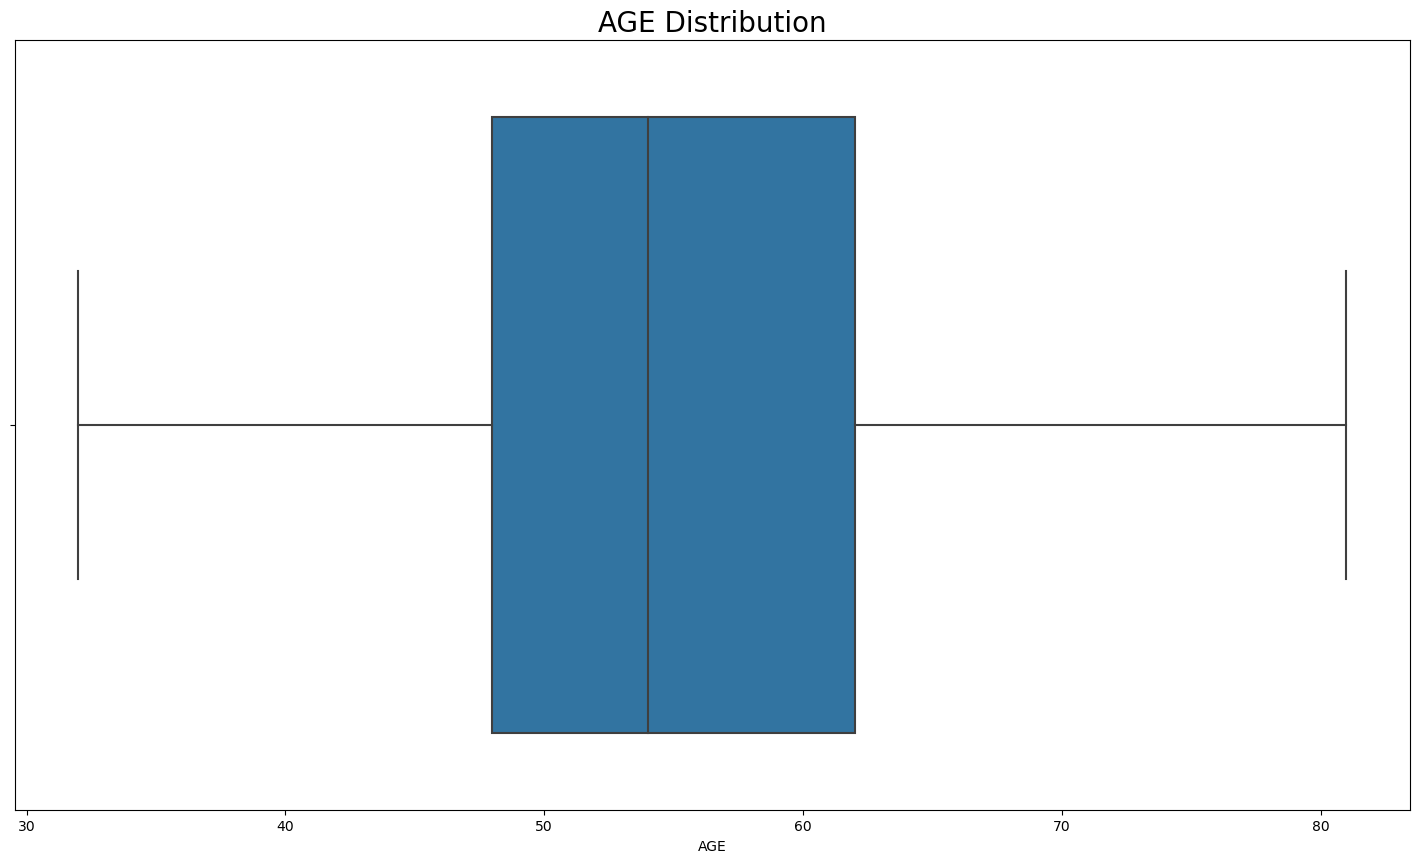

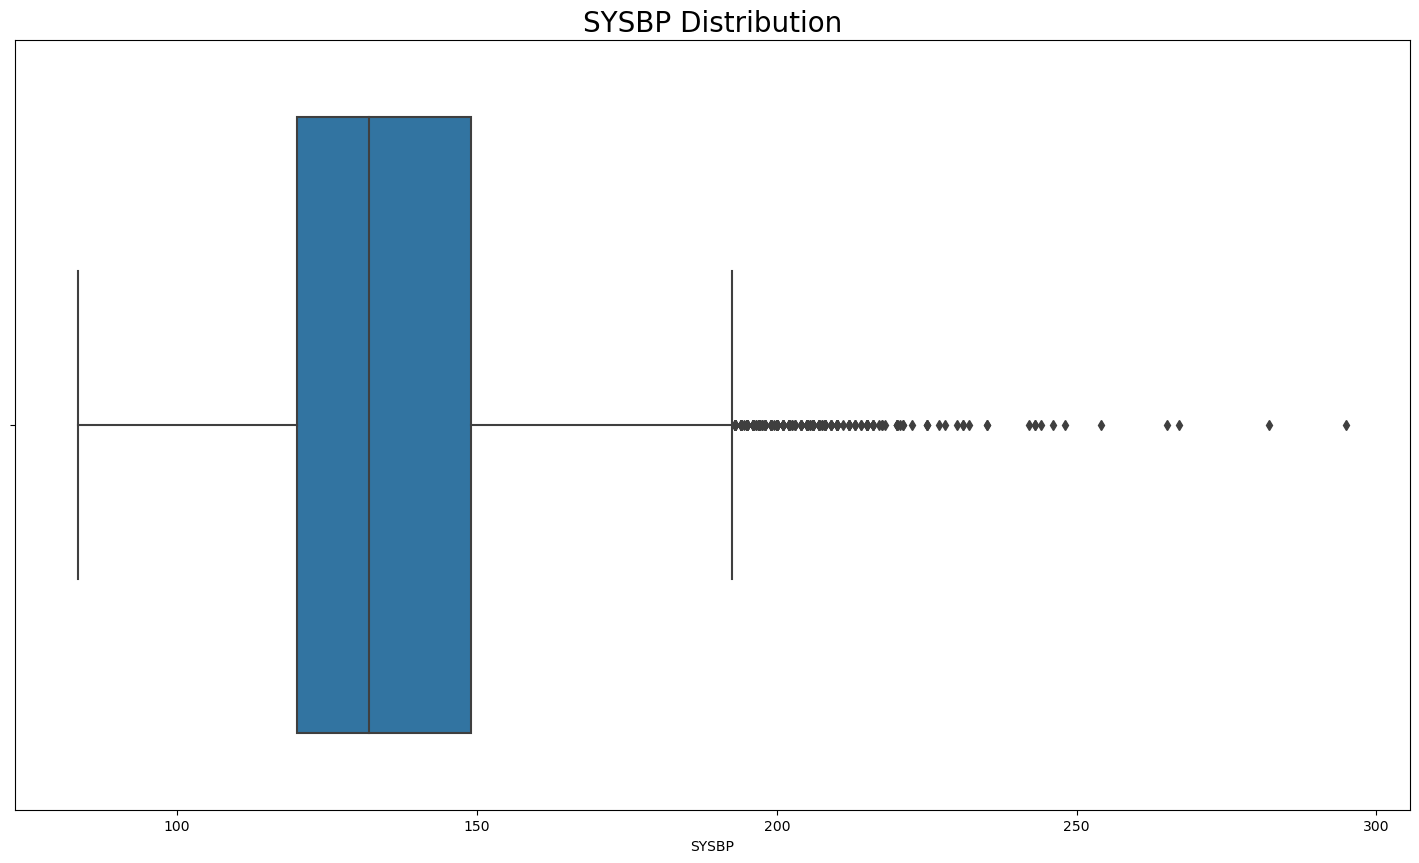

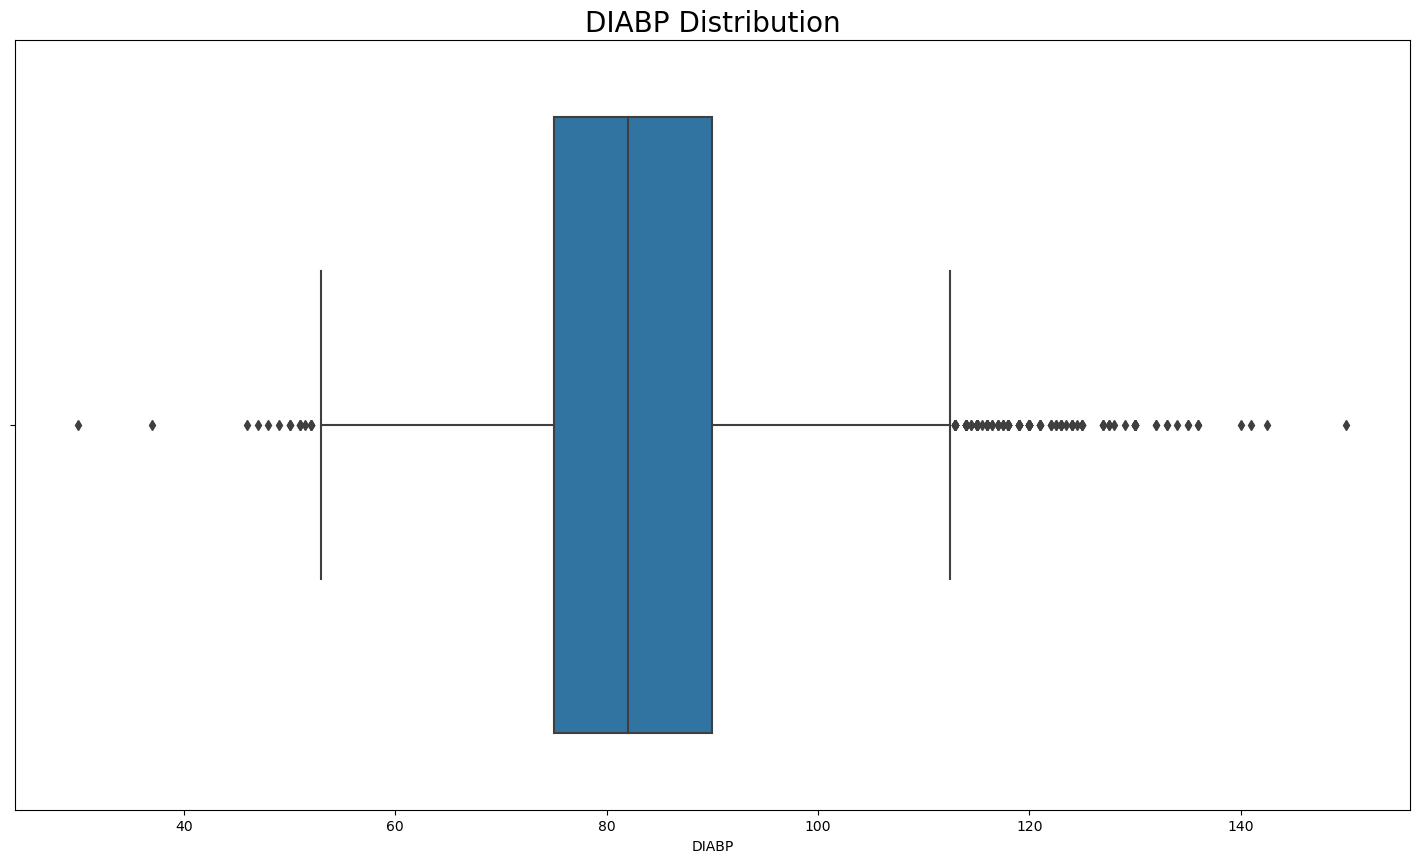

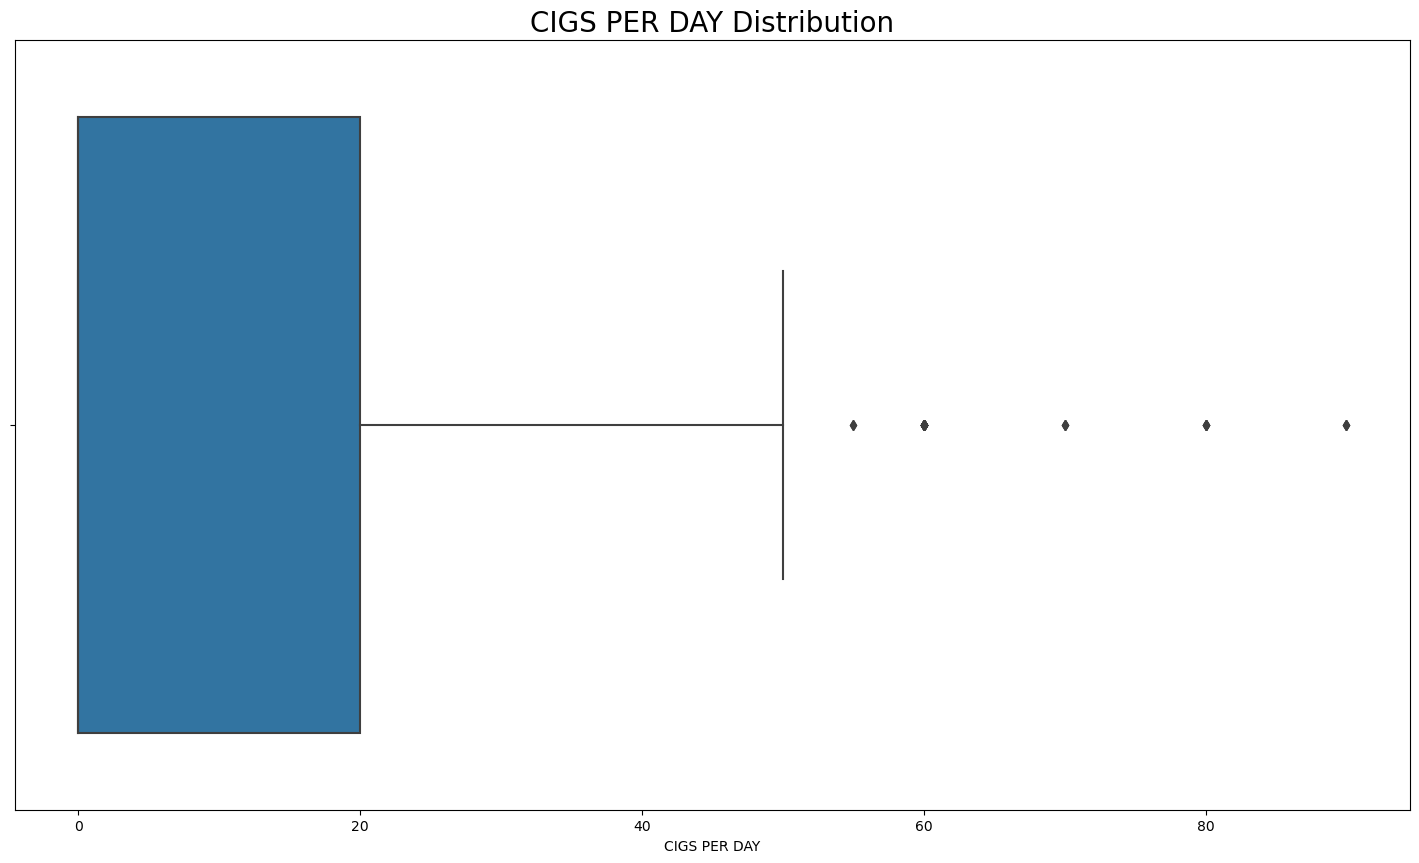

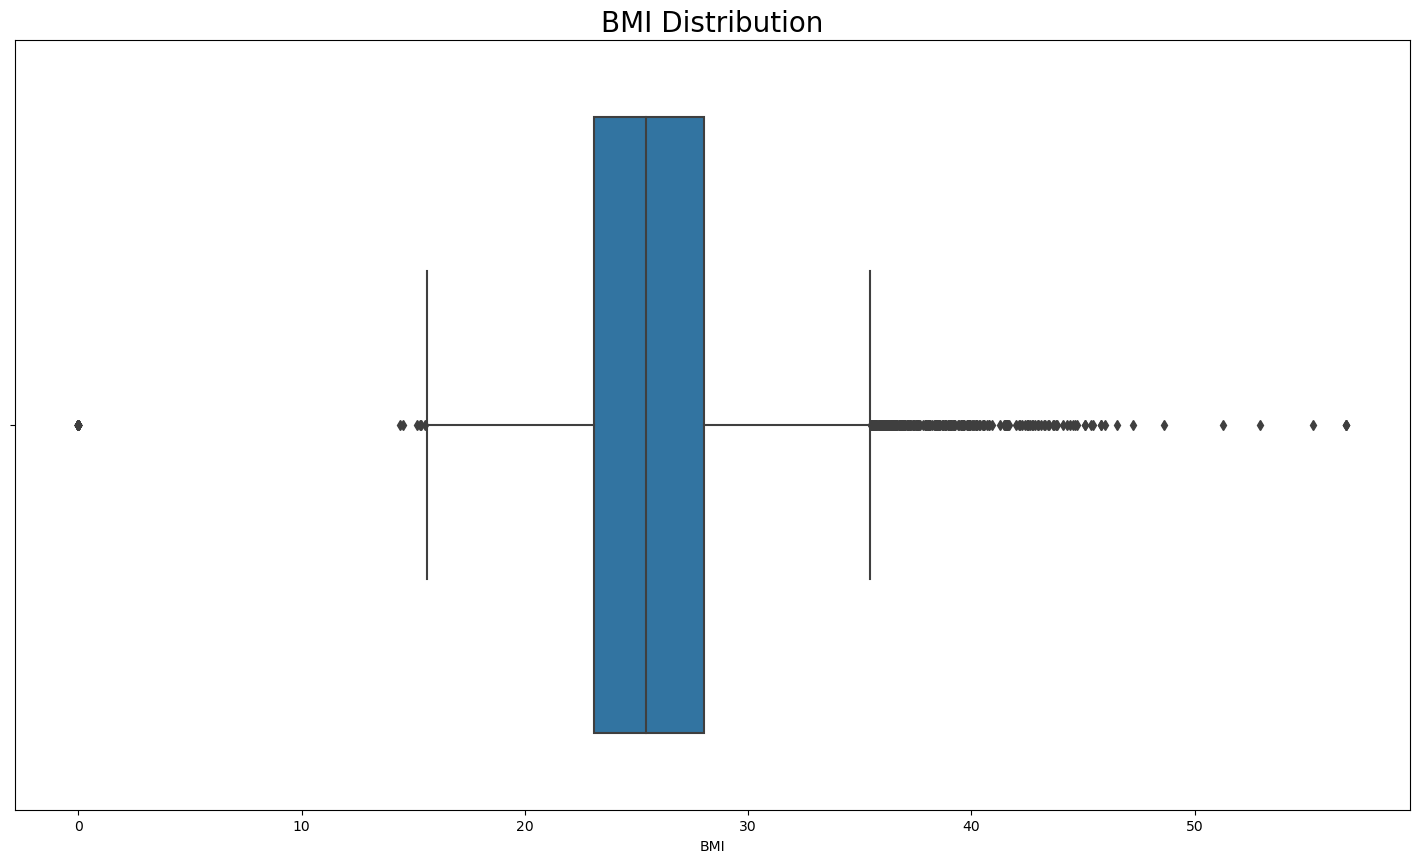

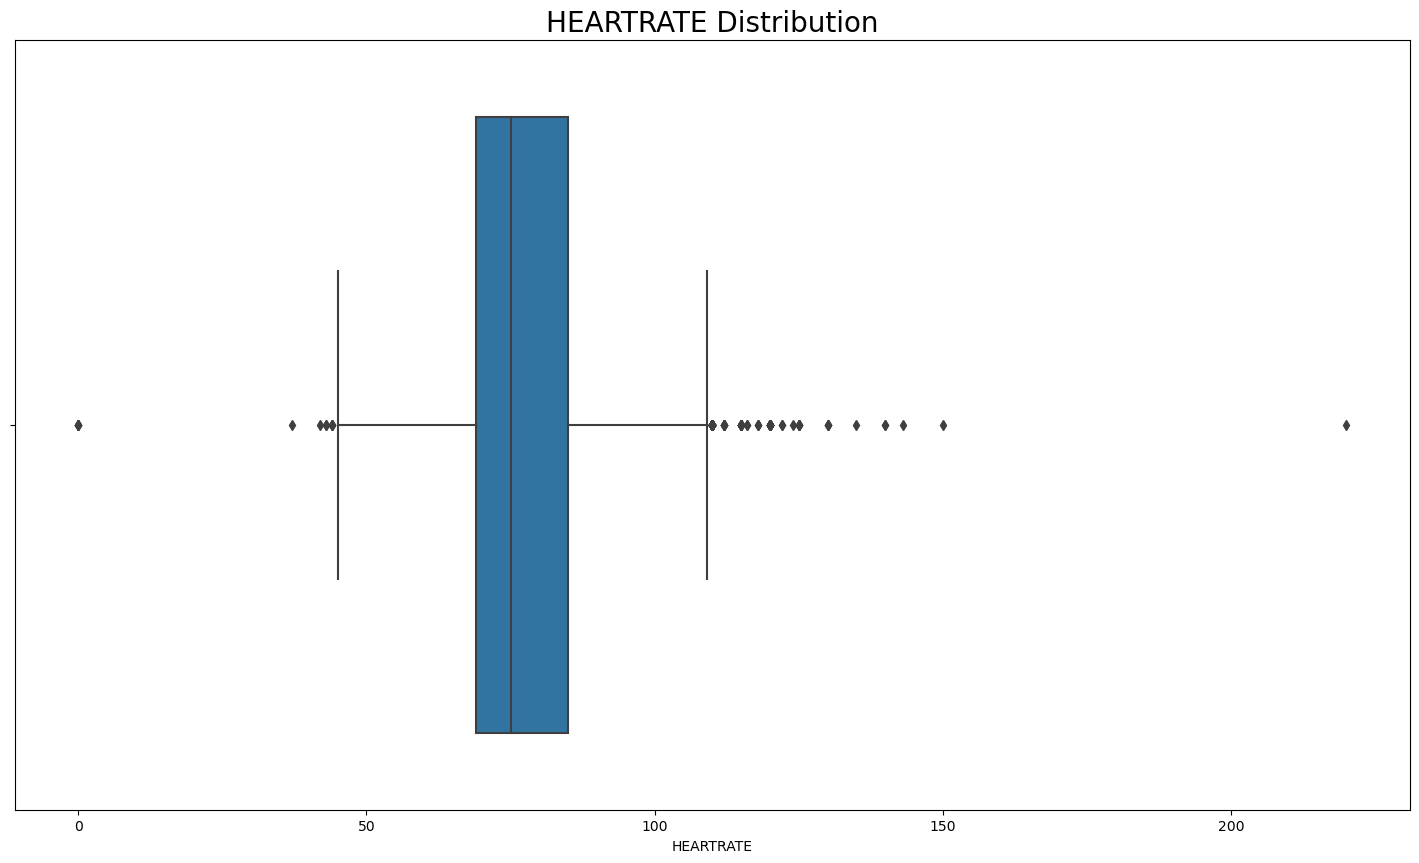

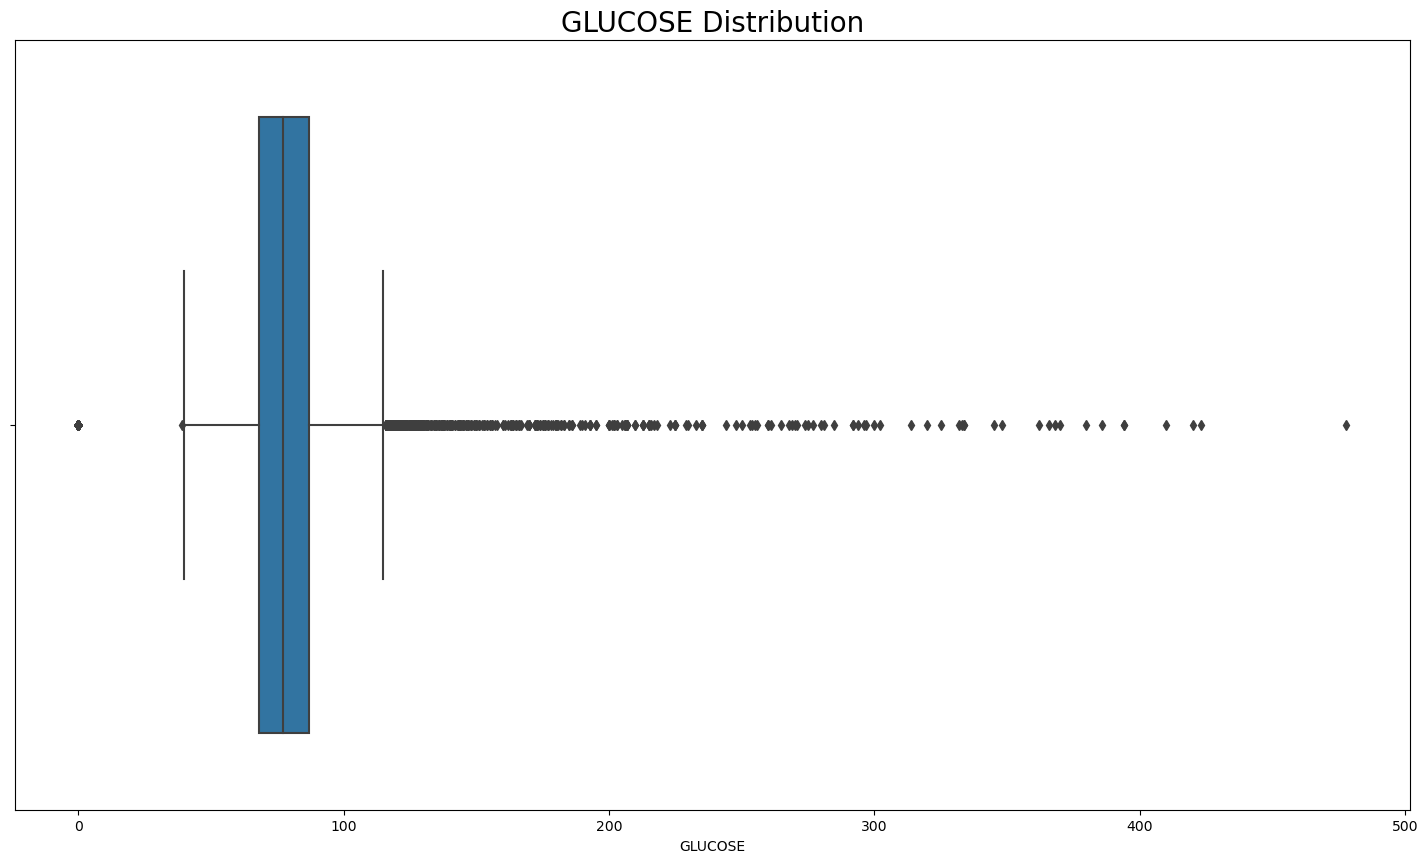

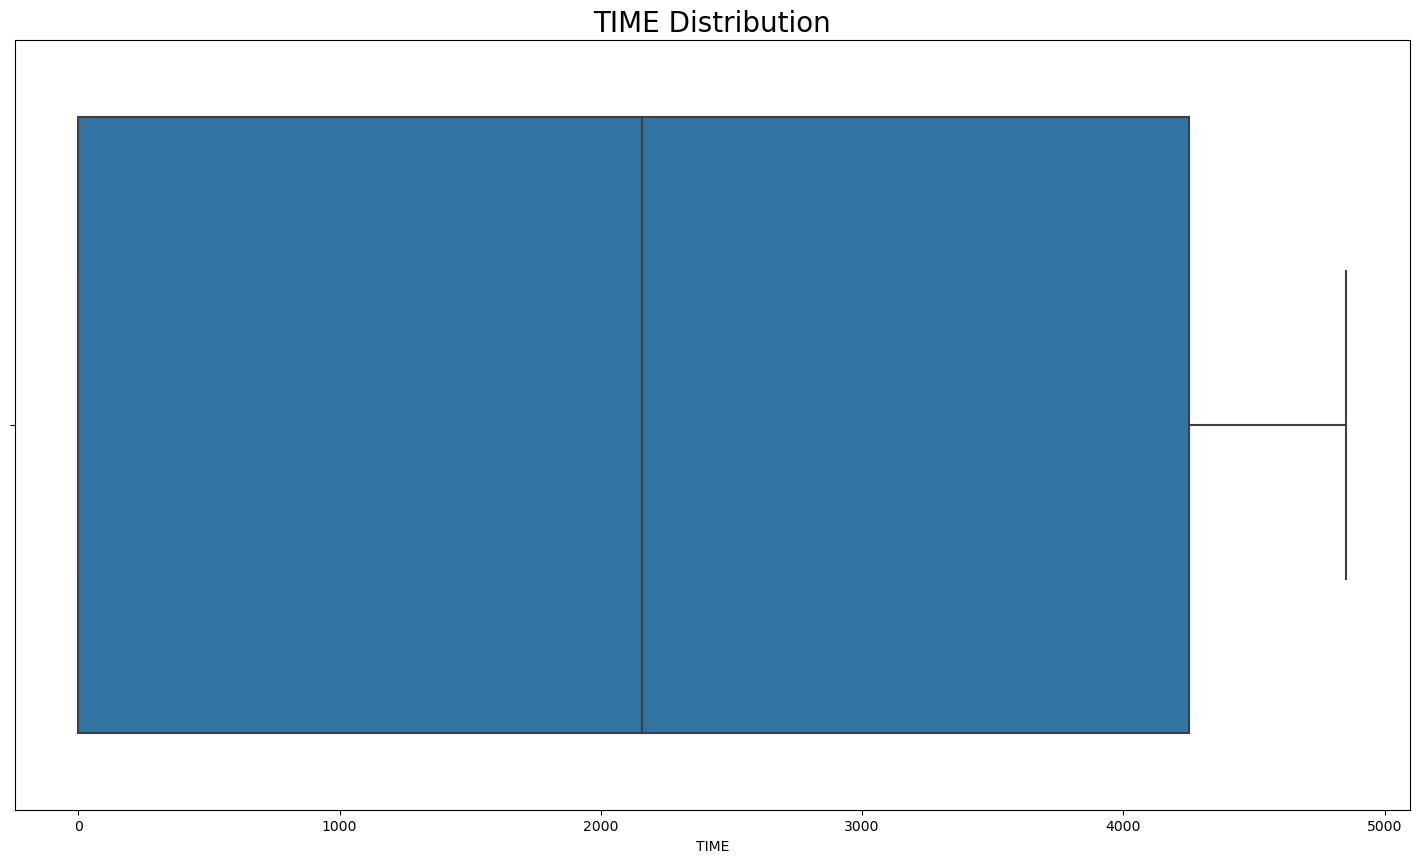

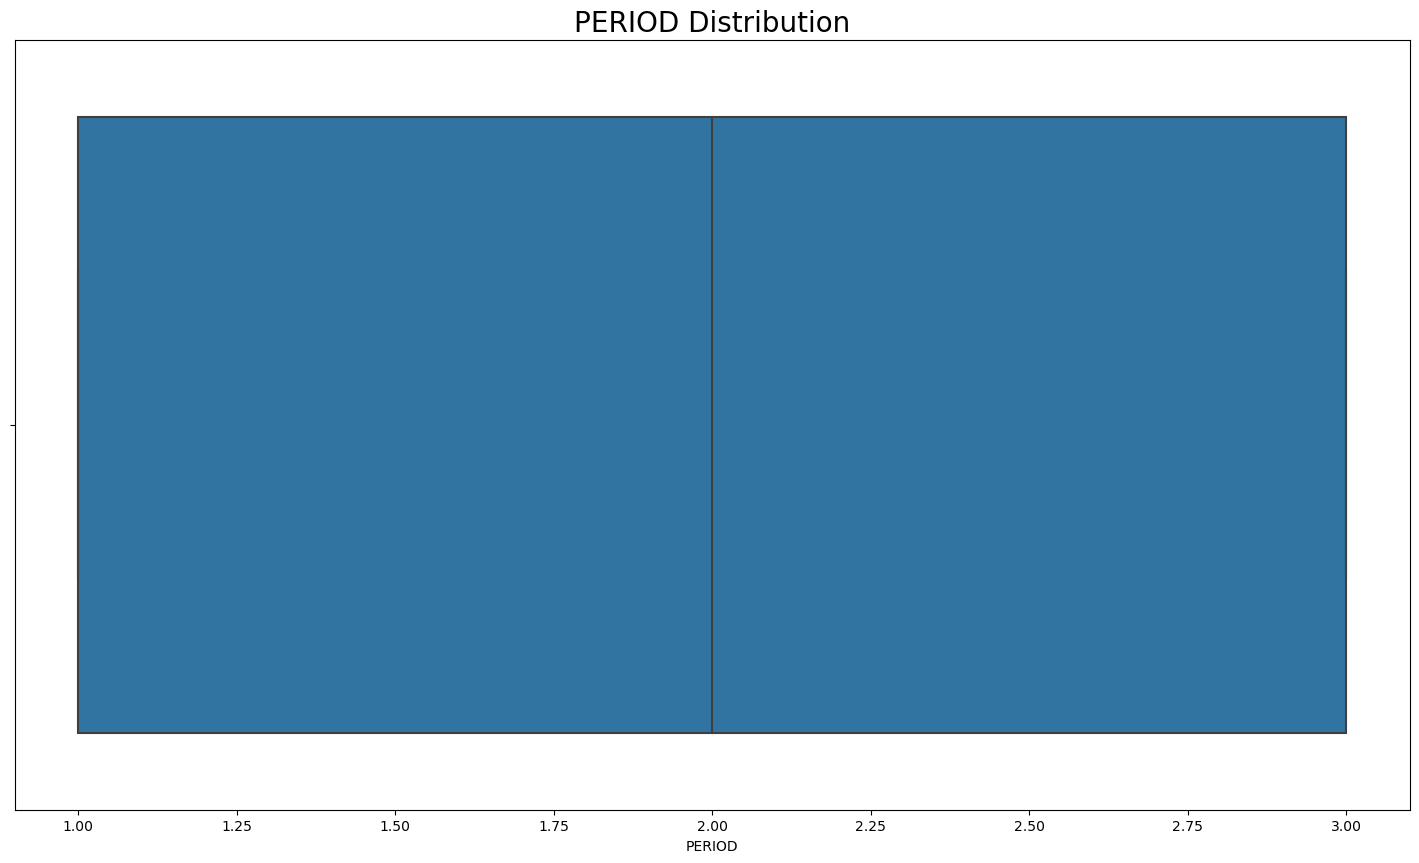

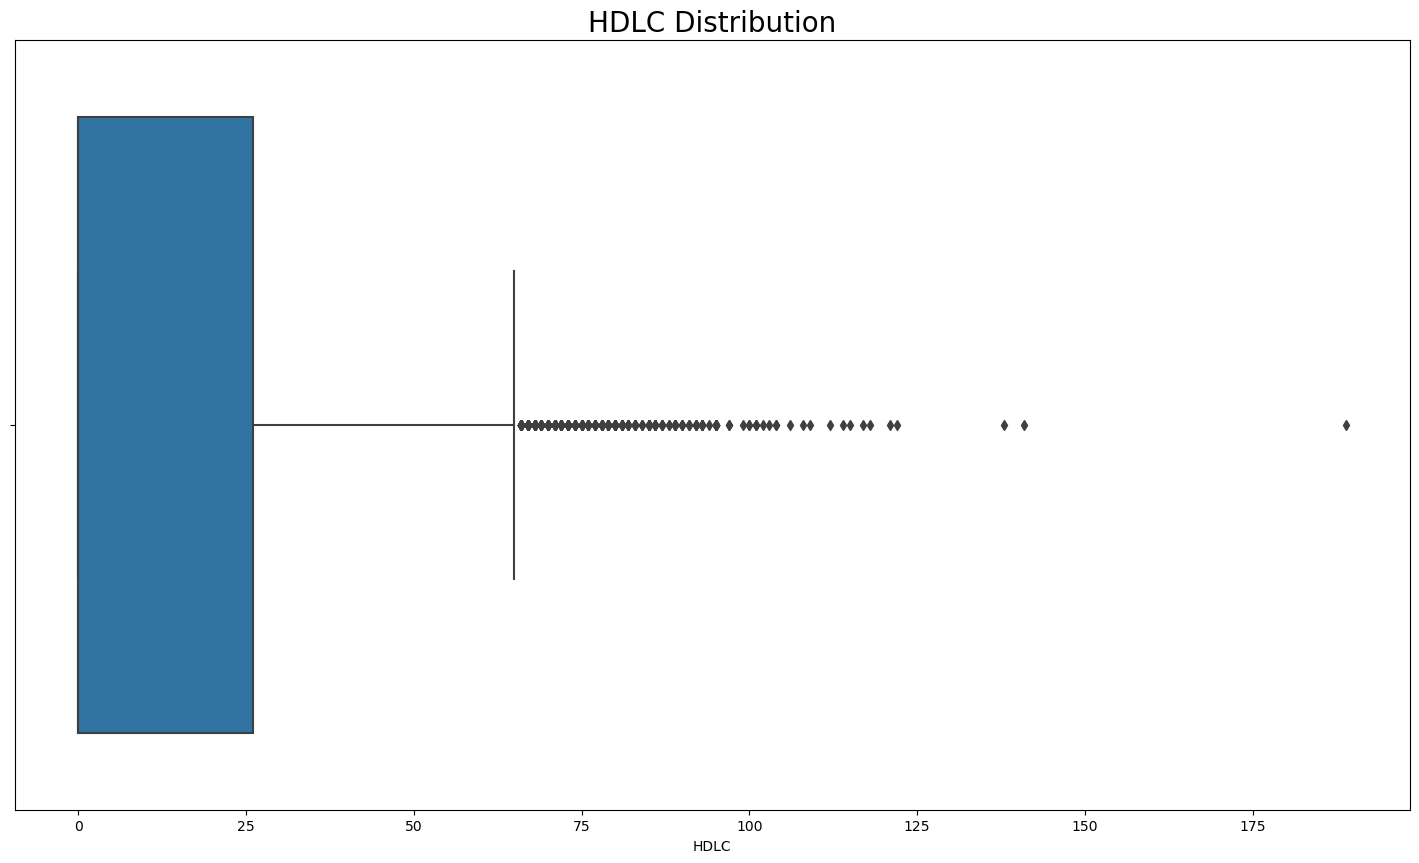

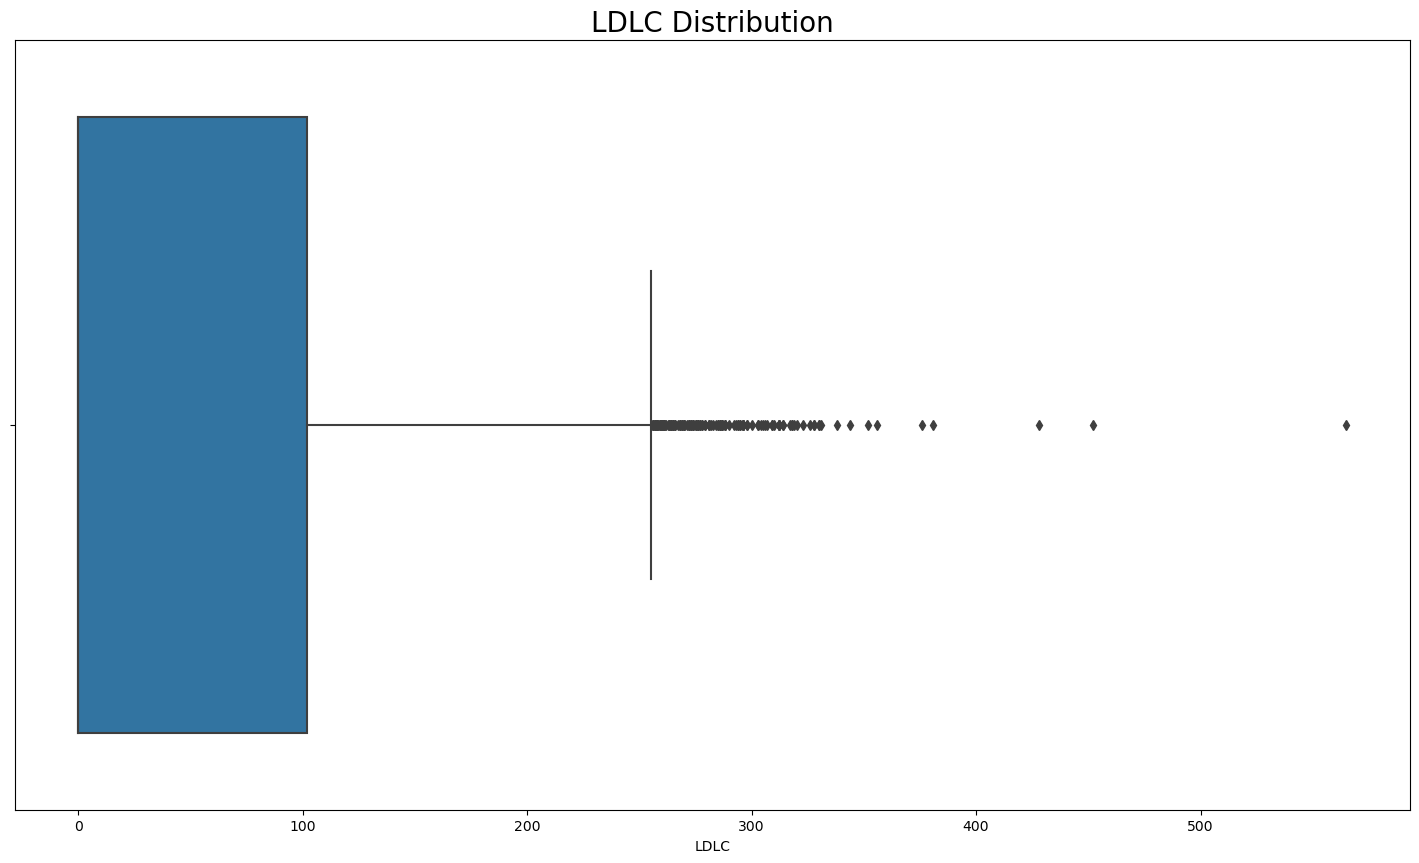

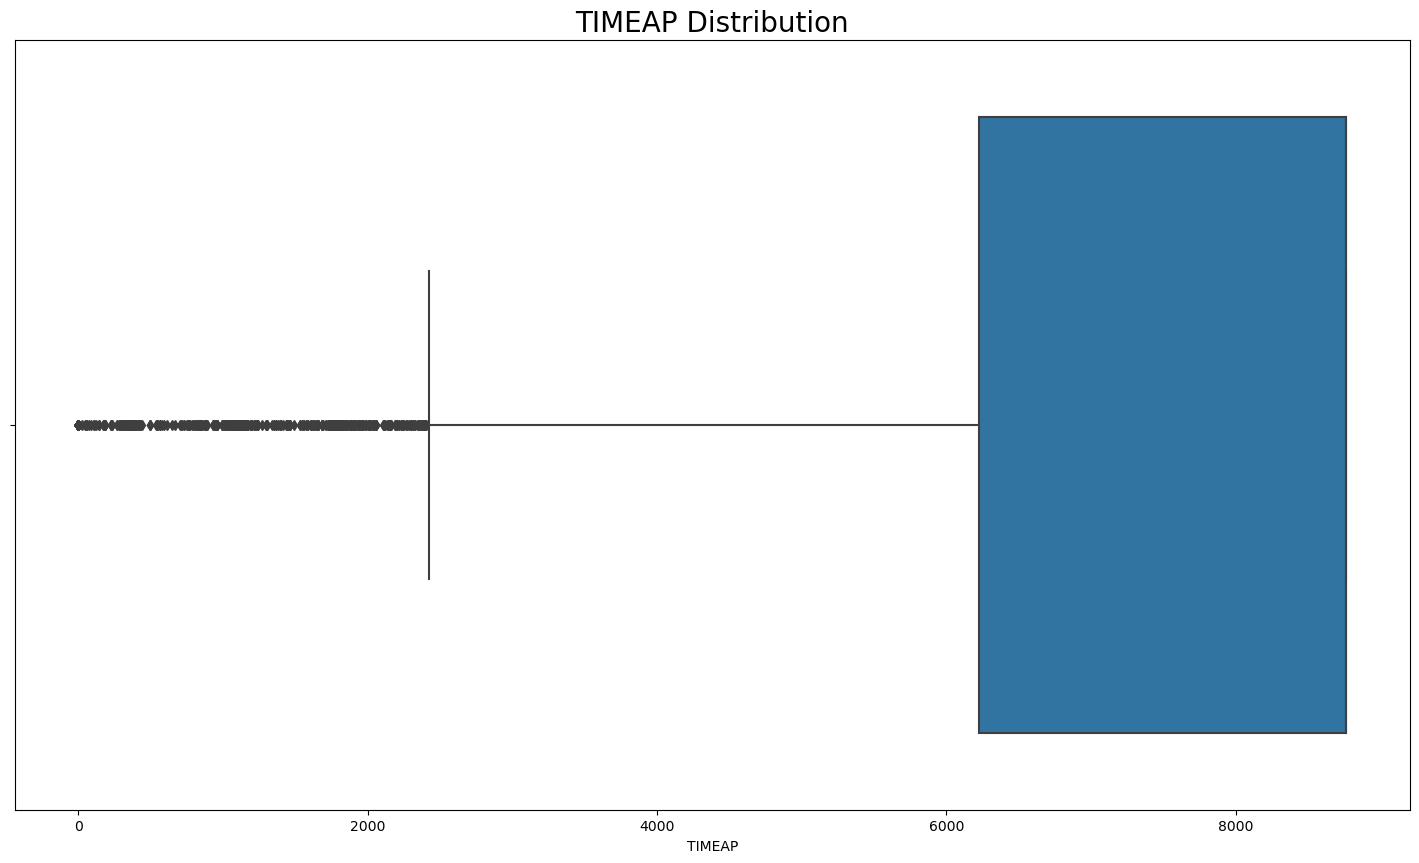

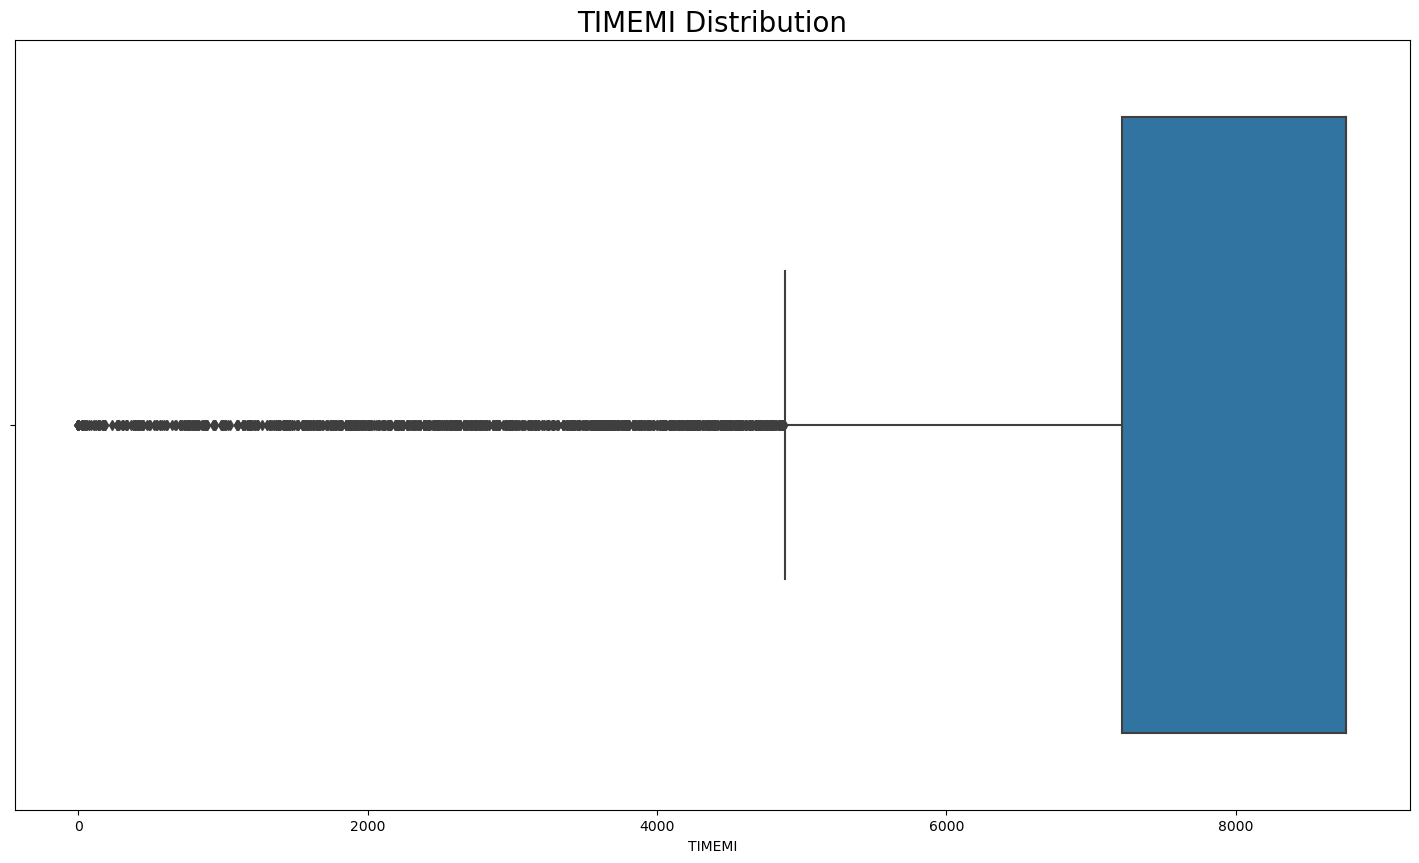

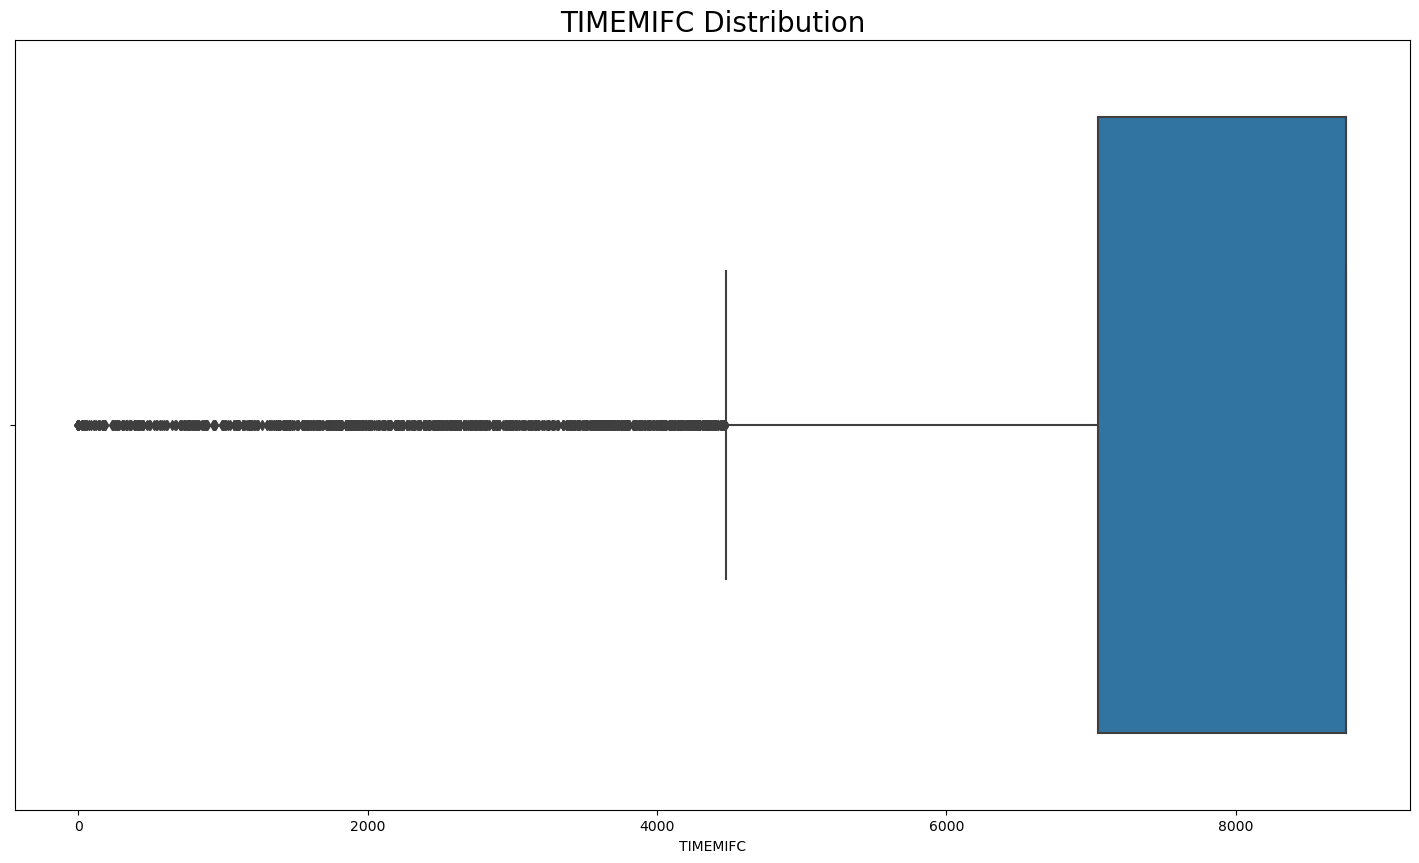

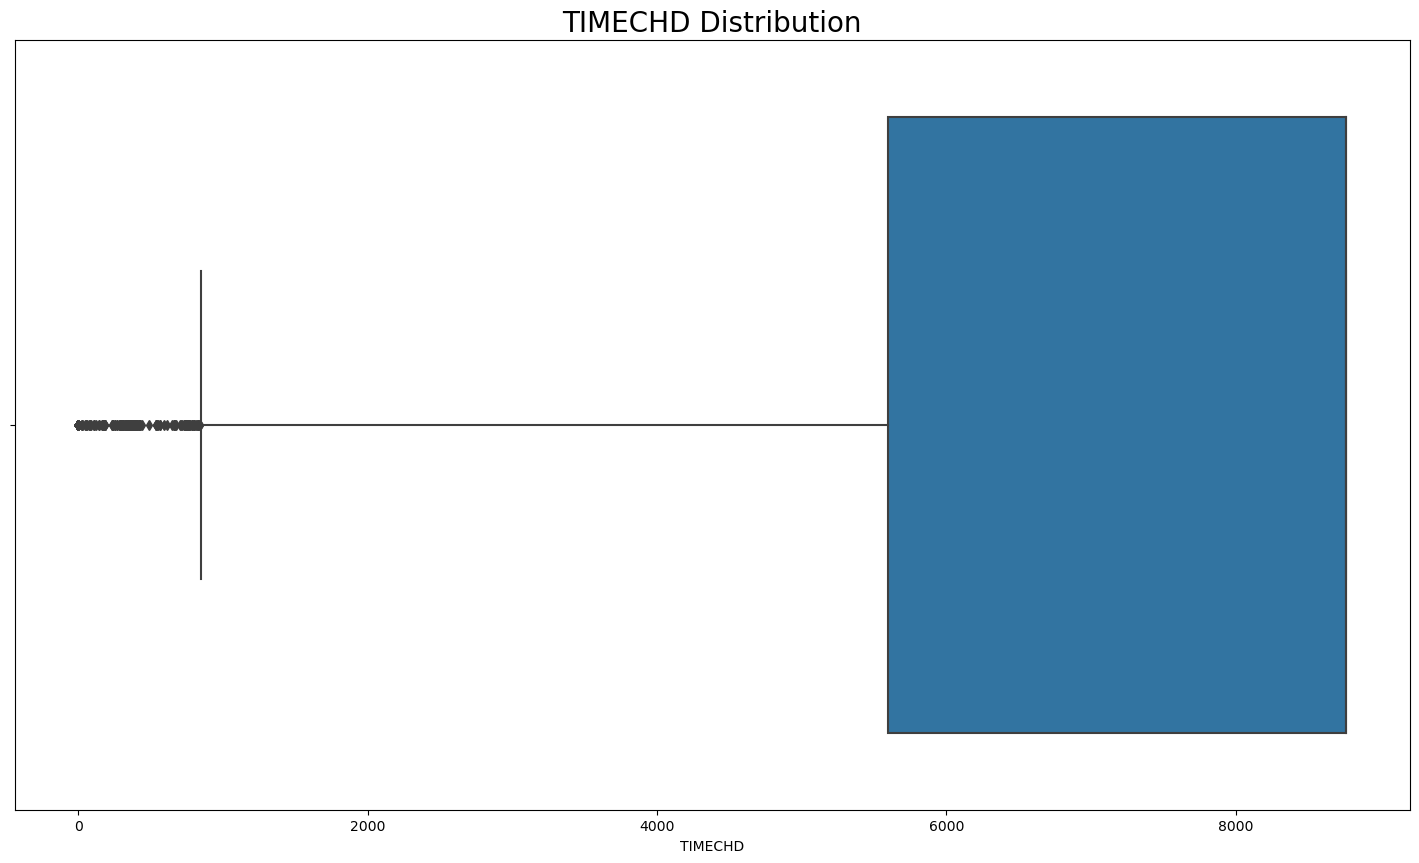

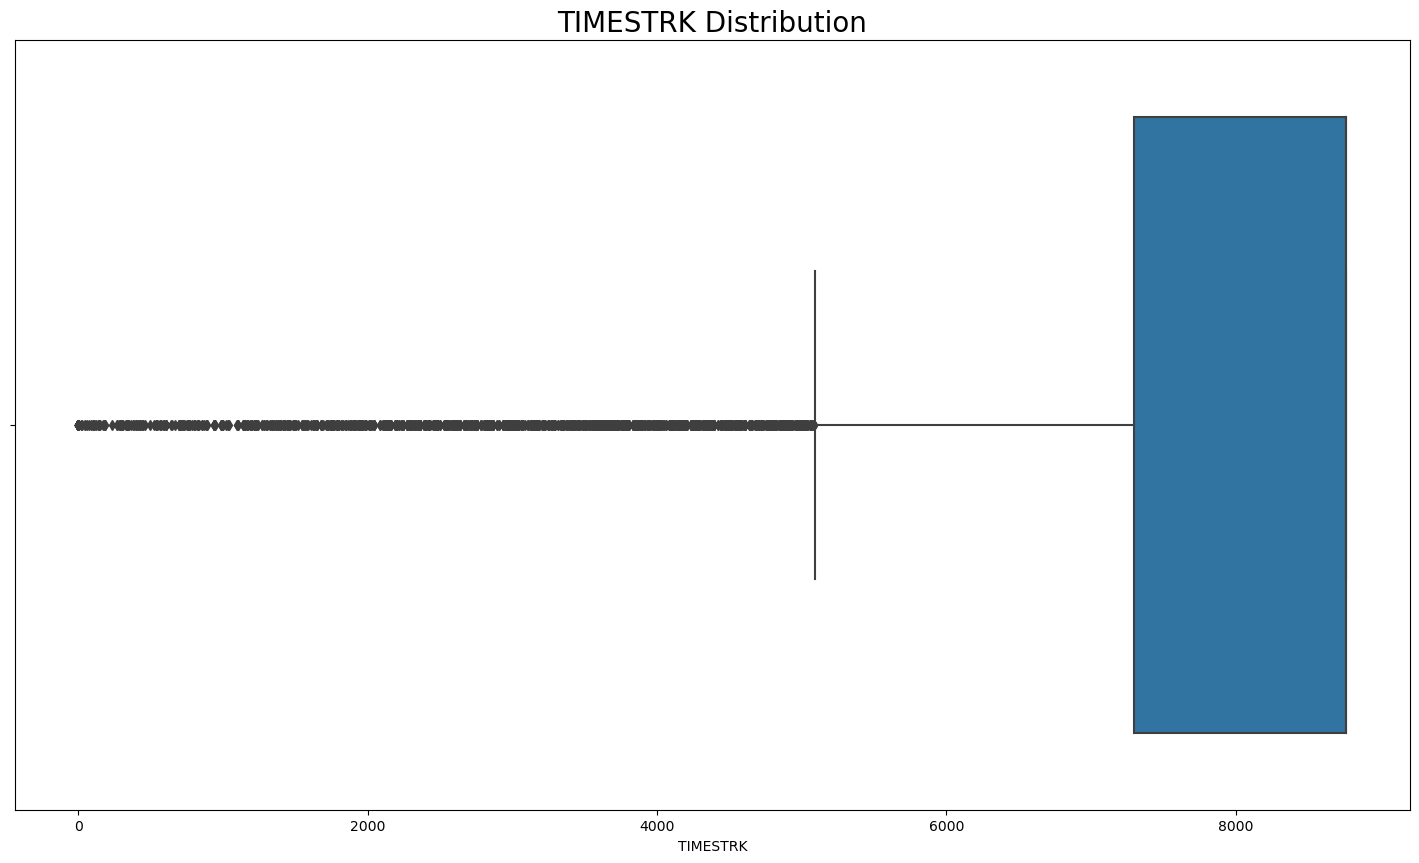

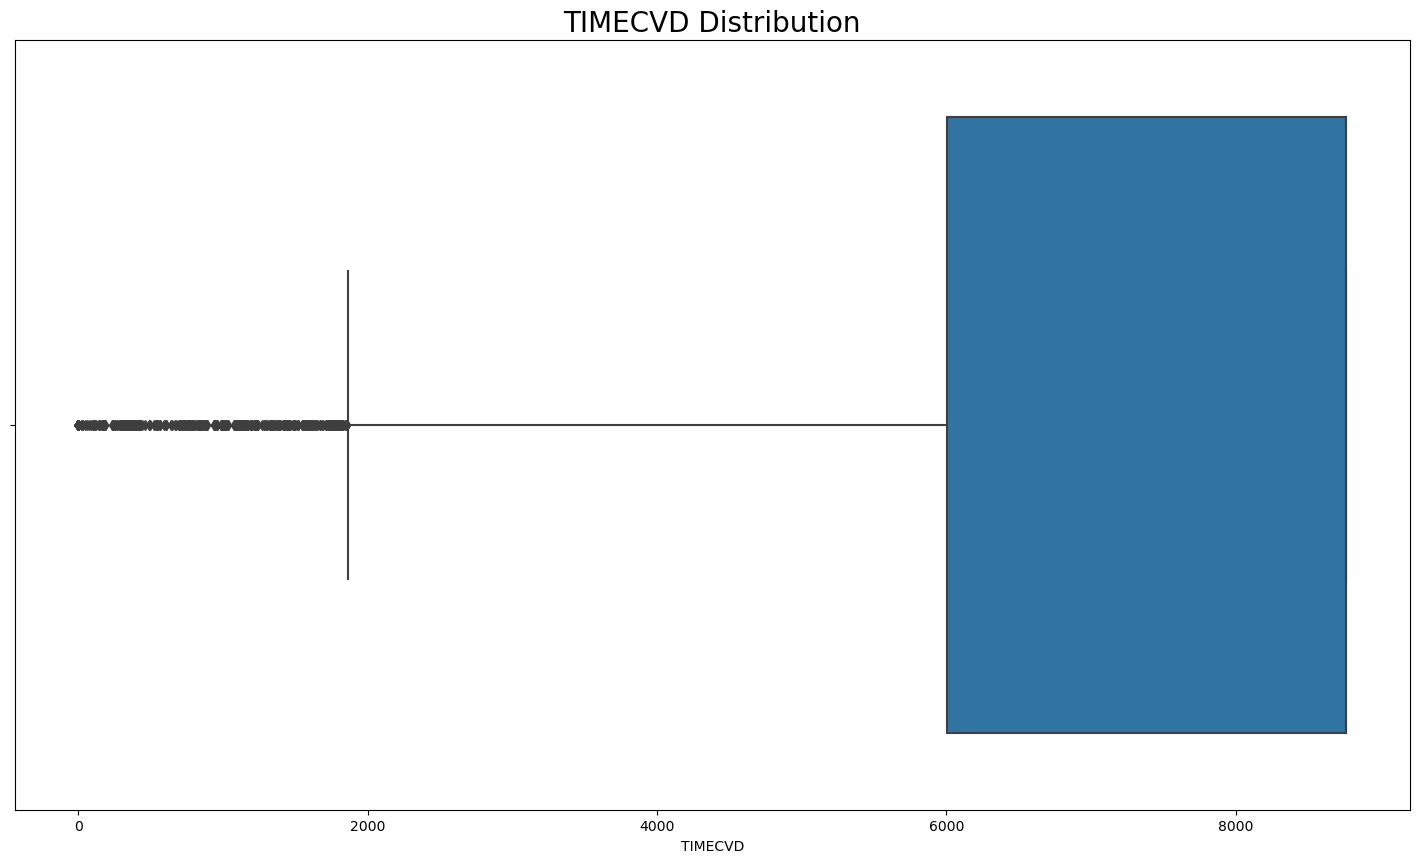

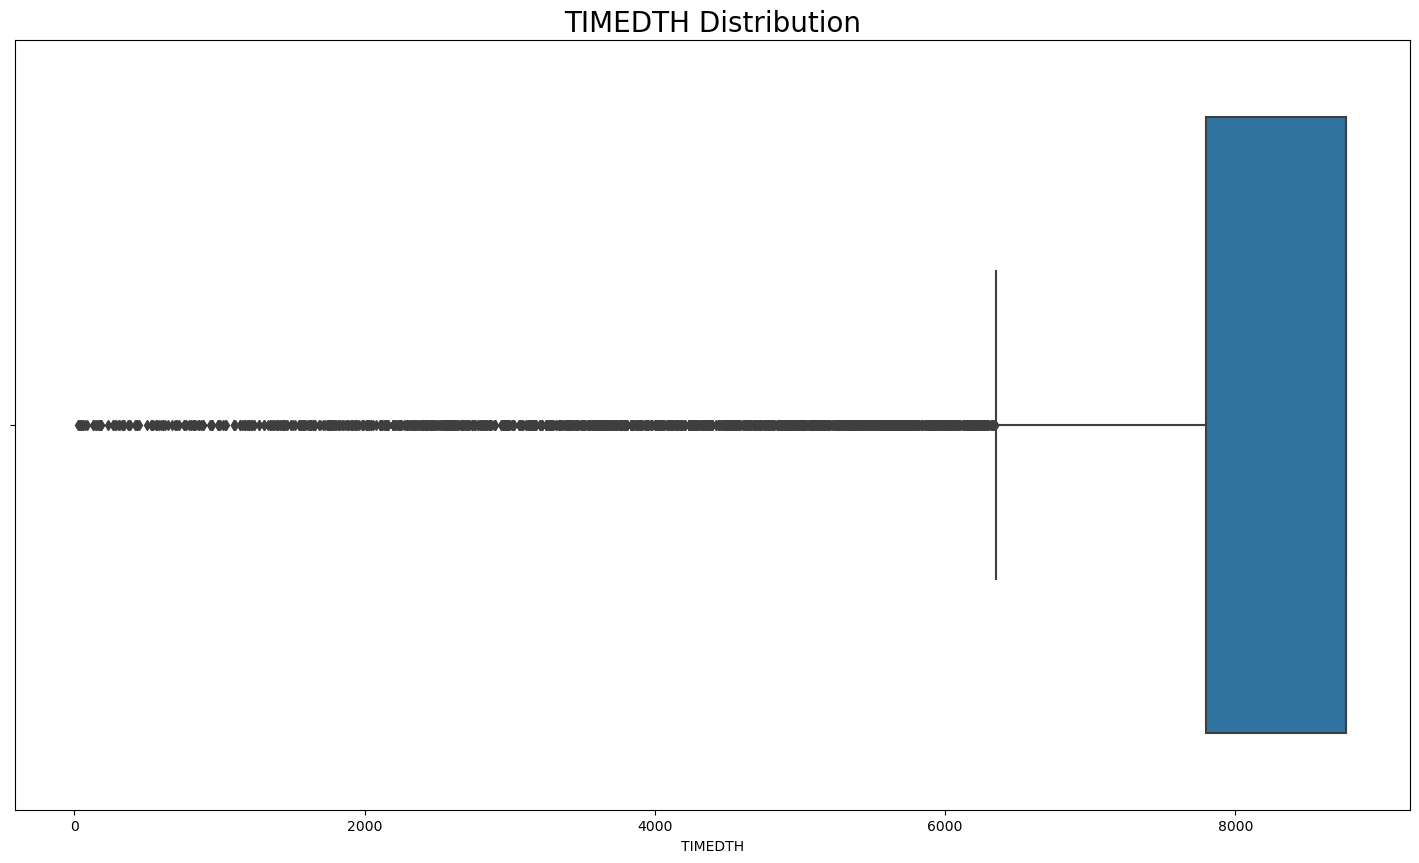

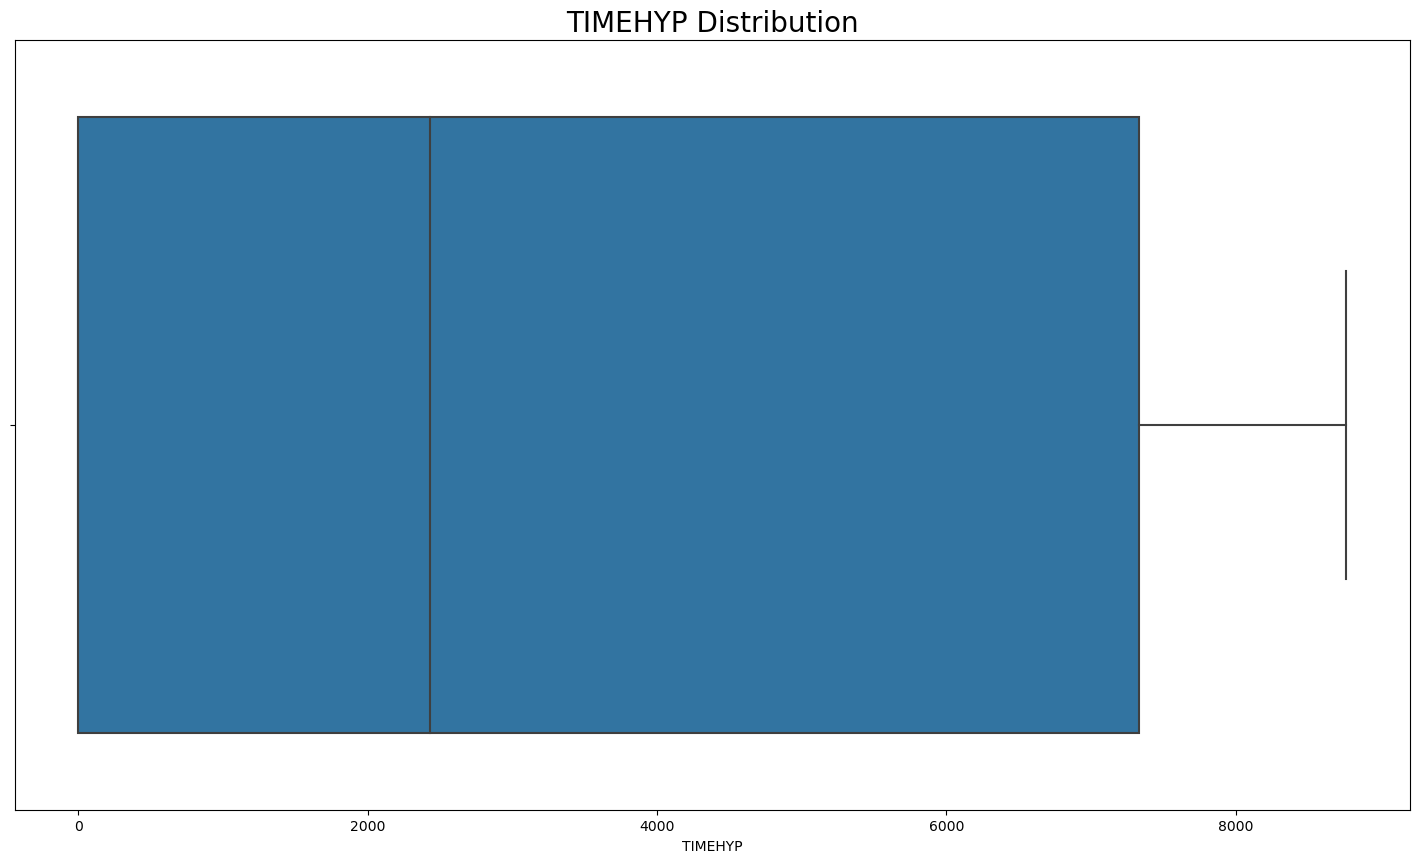

In [17]:
numeric_features = ['RANDID', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGS PER DAY', 'BMI', 'HEARTRATE', 'GLUCOSE', 'TIME', 'PERIOD', 'HDLC', 'LDLC', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.boxplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

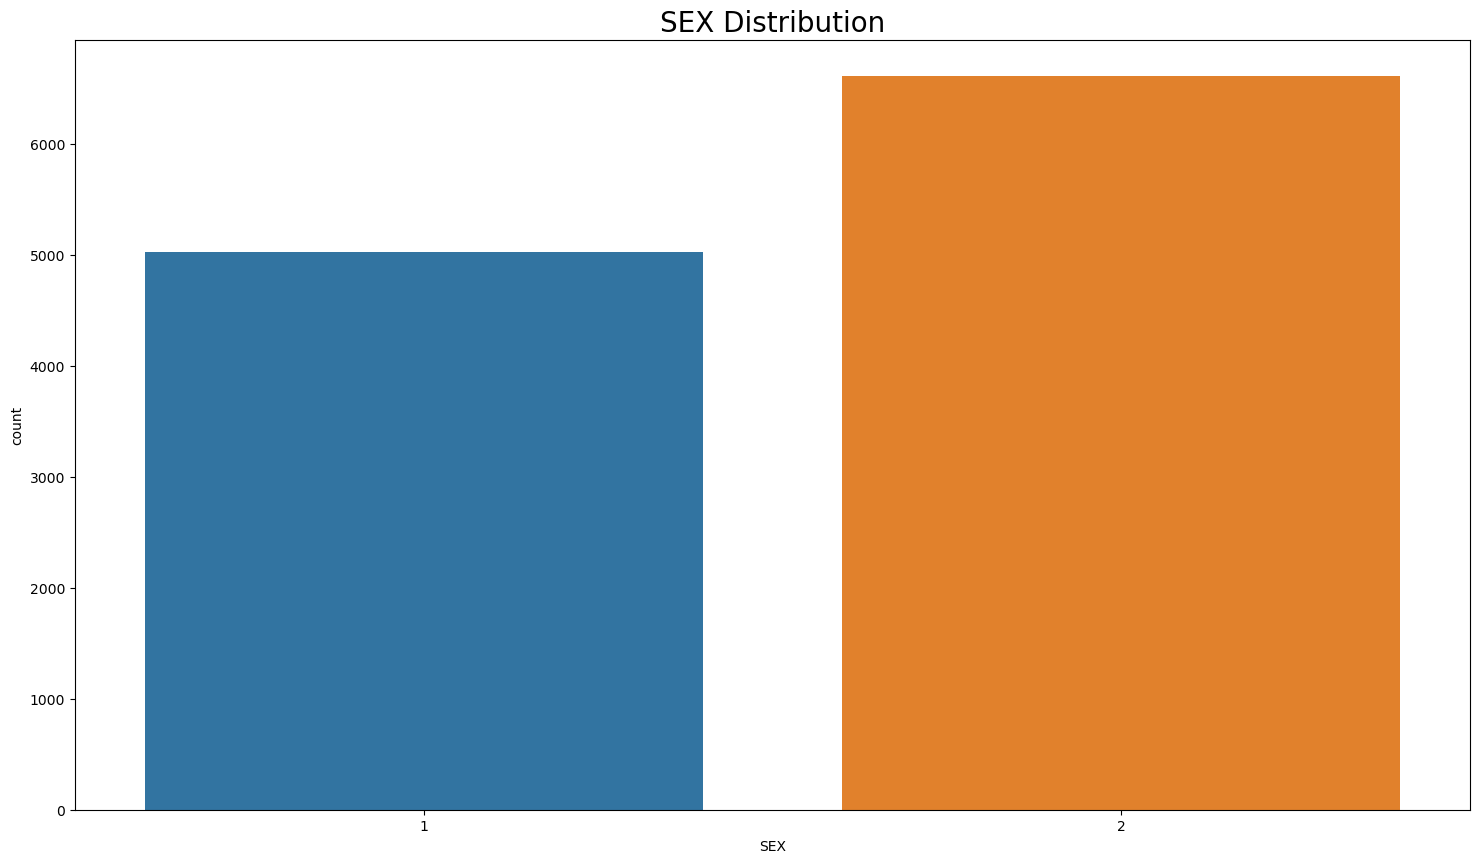

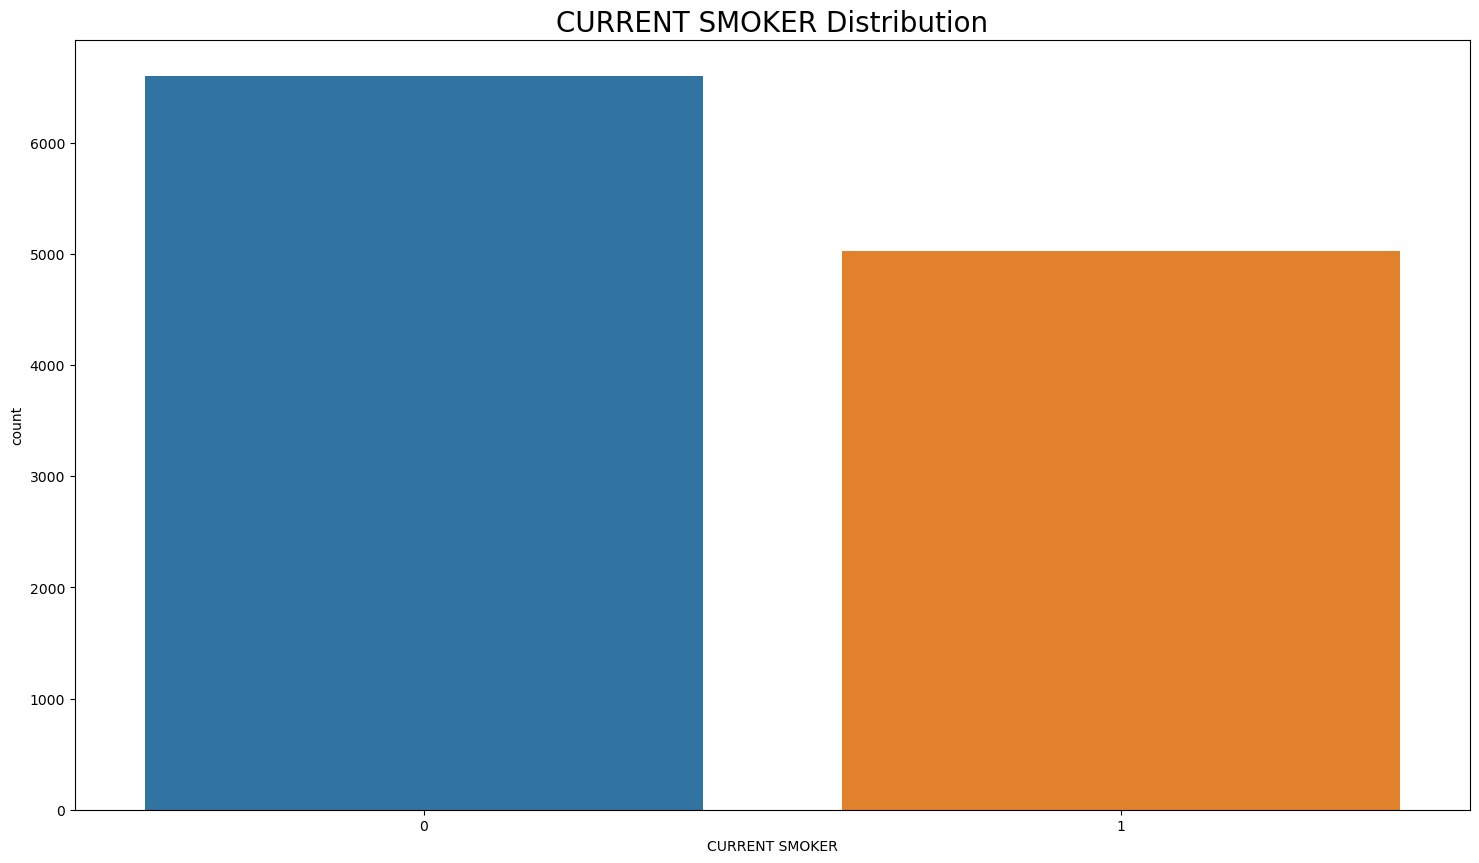

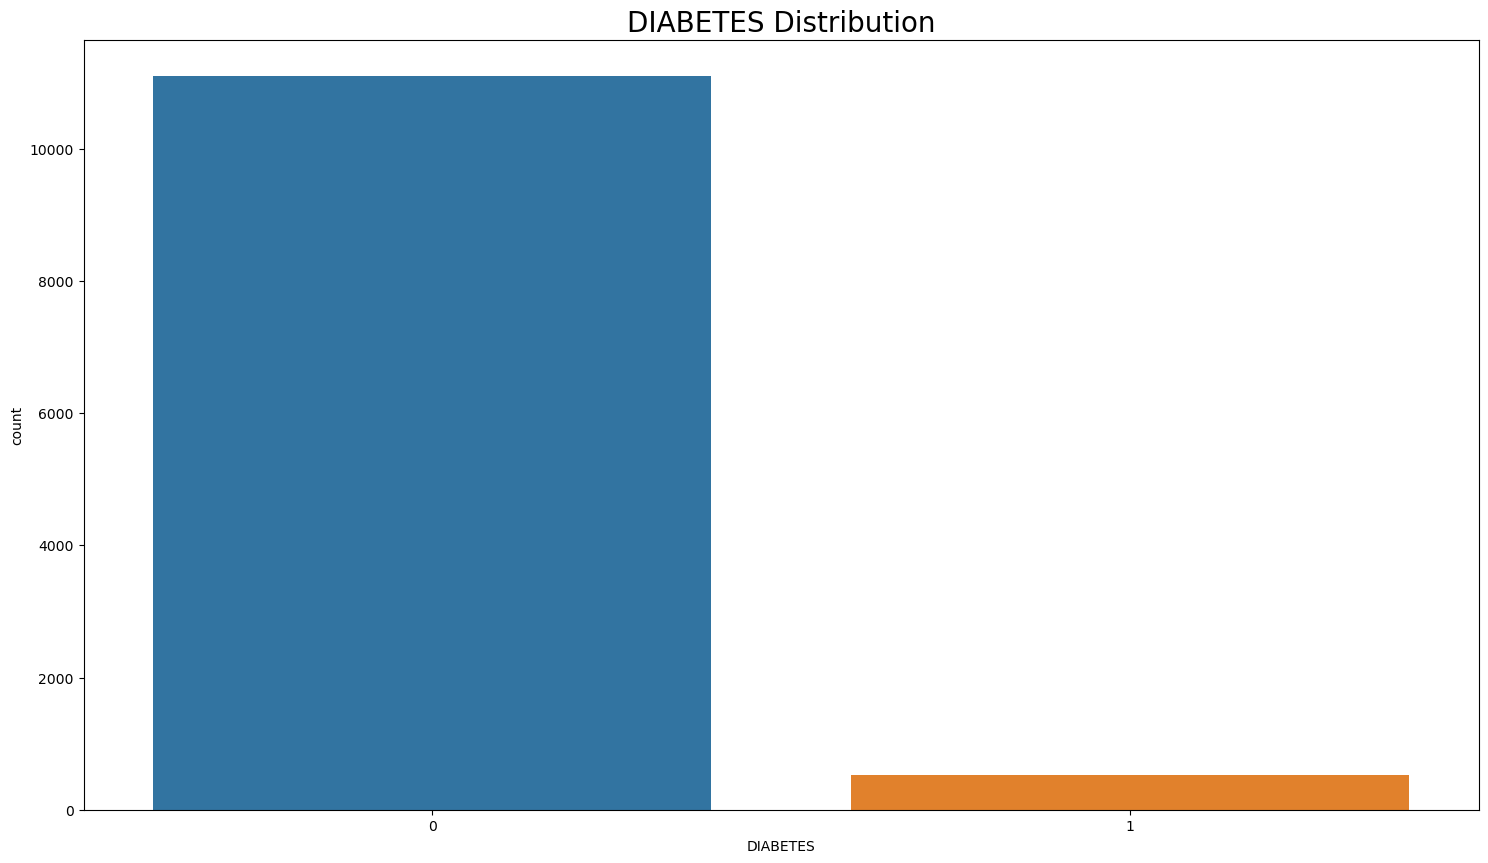

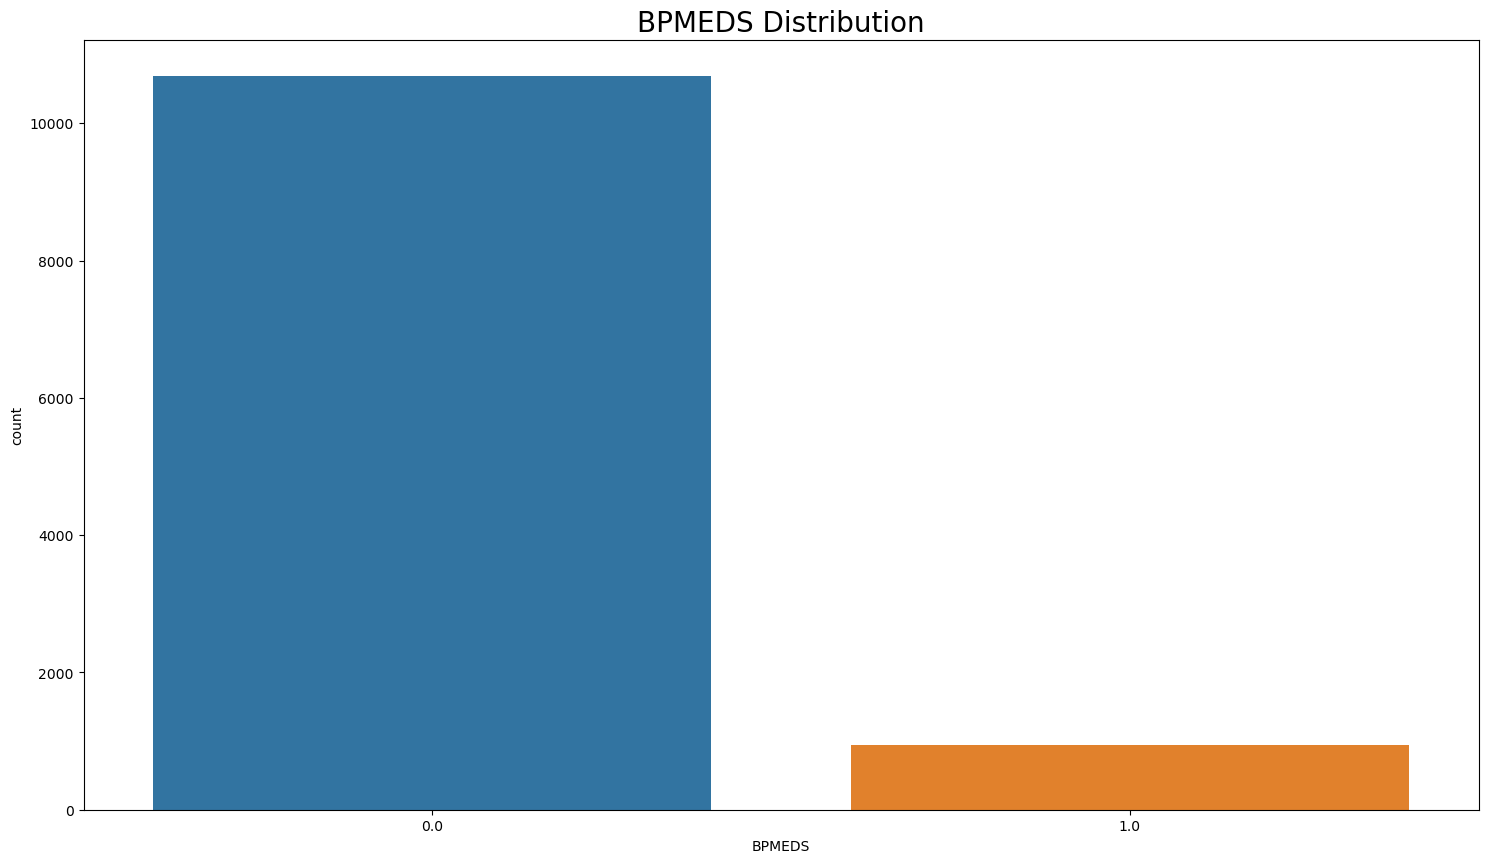

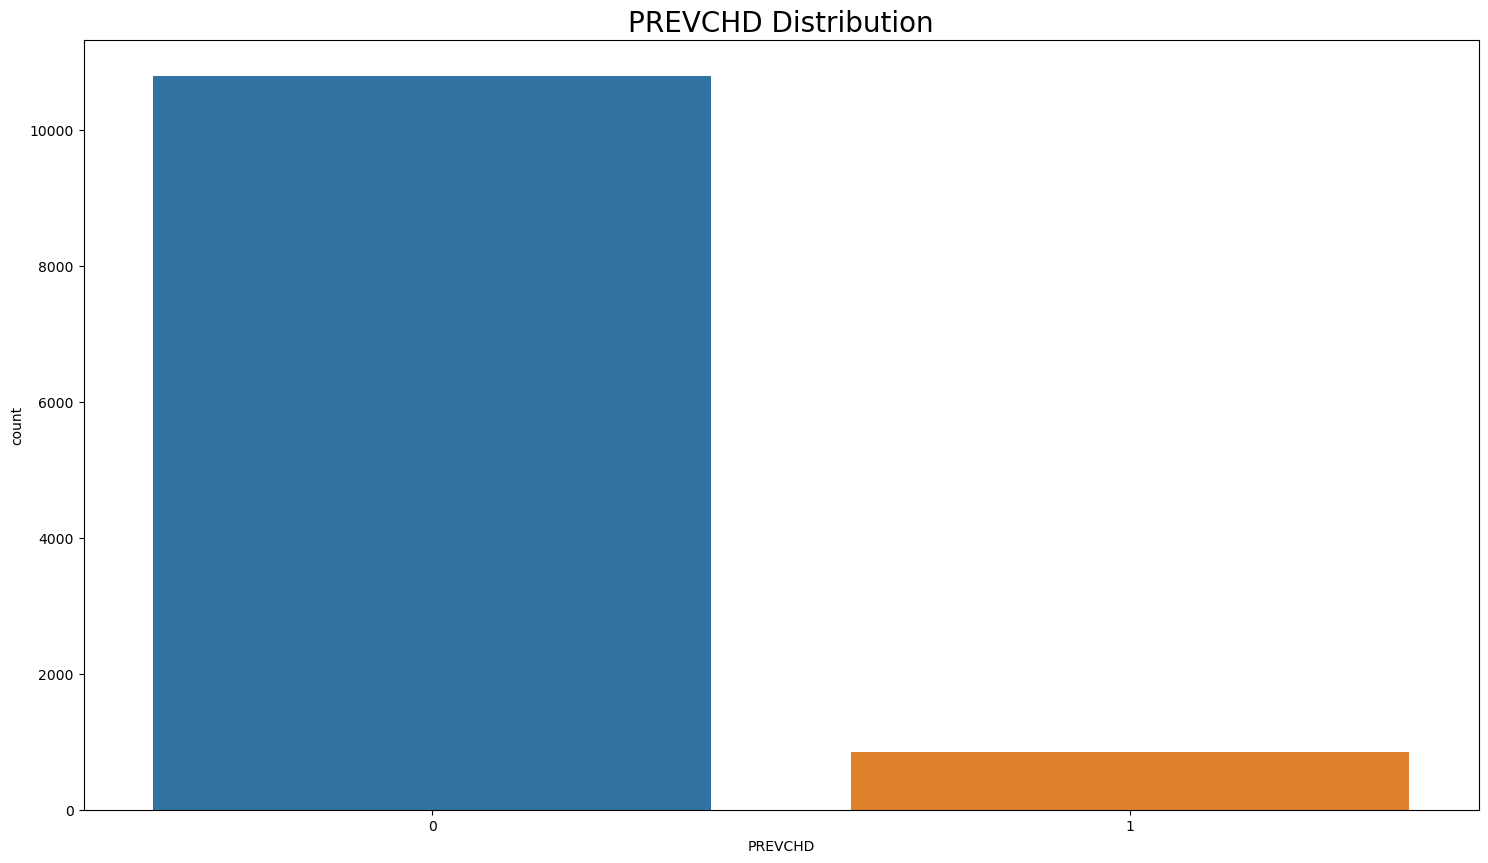

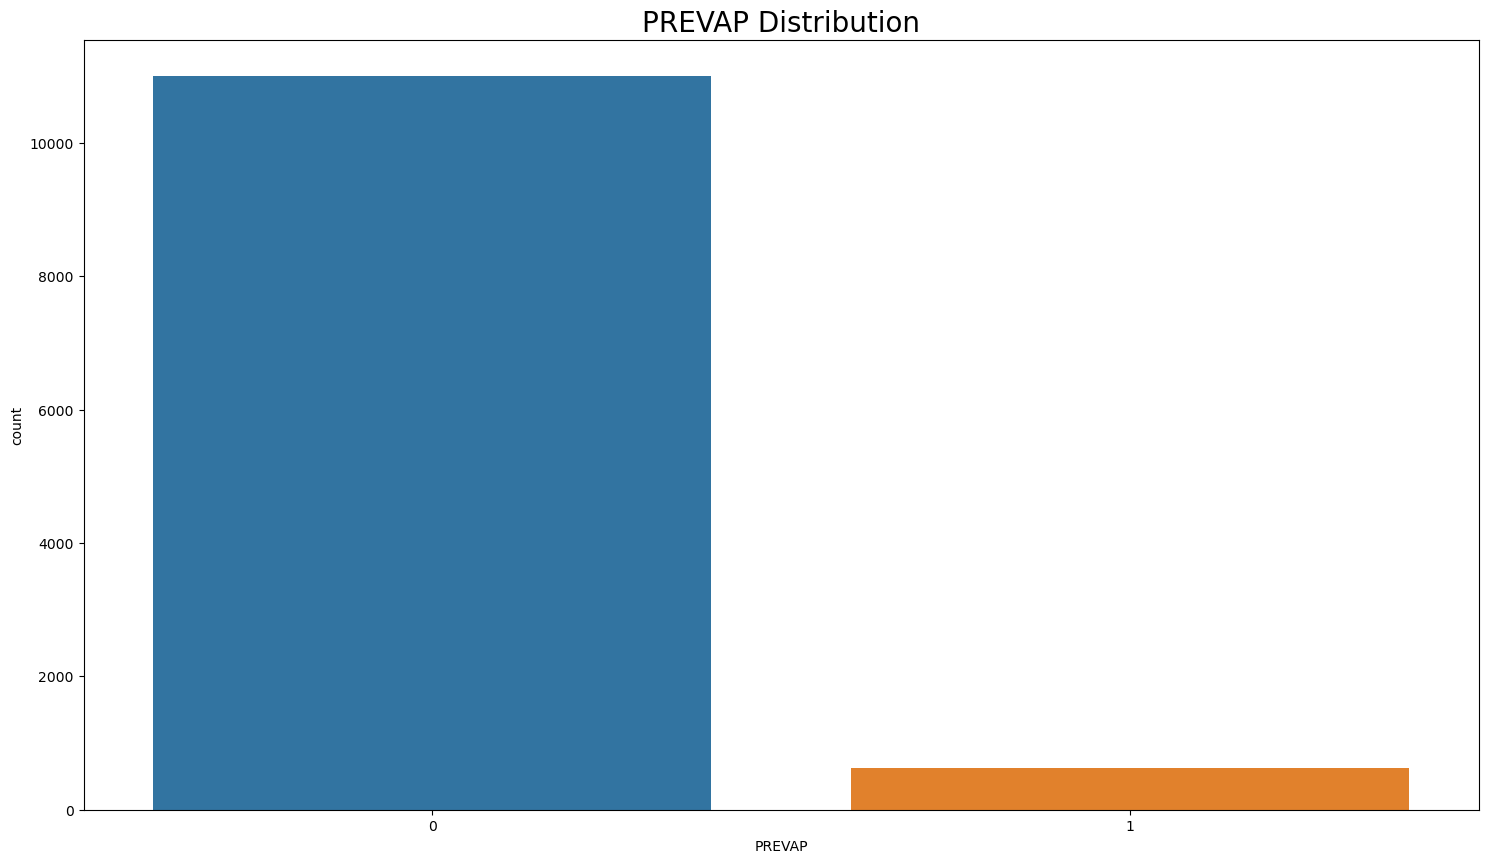

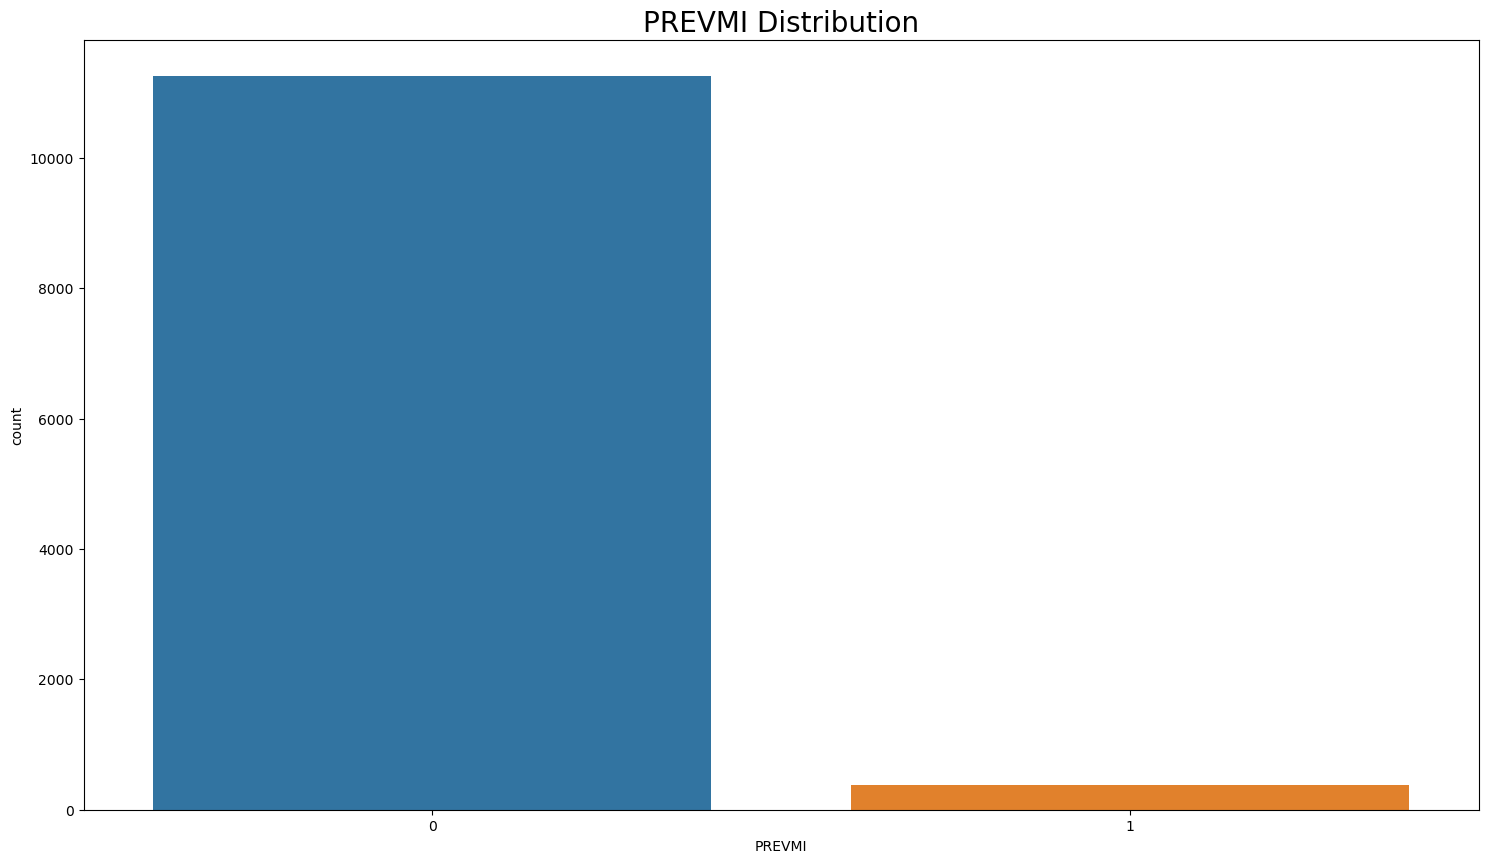

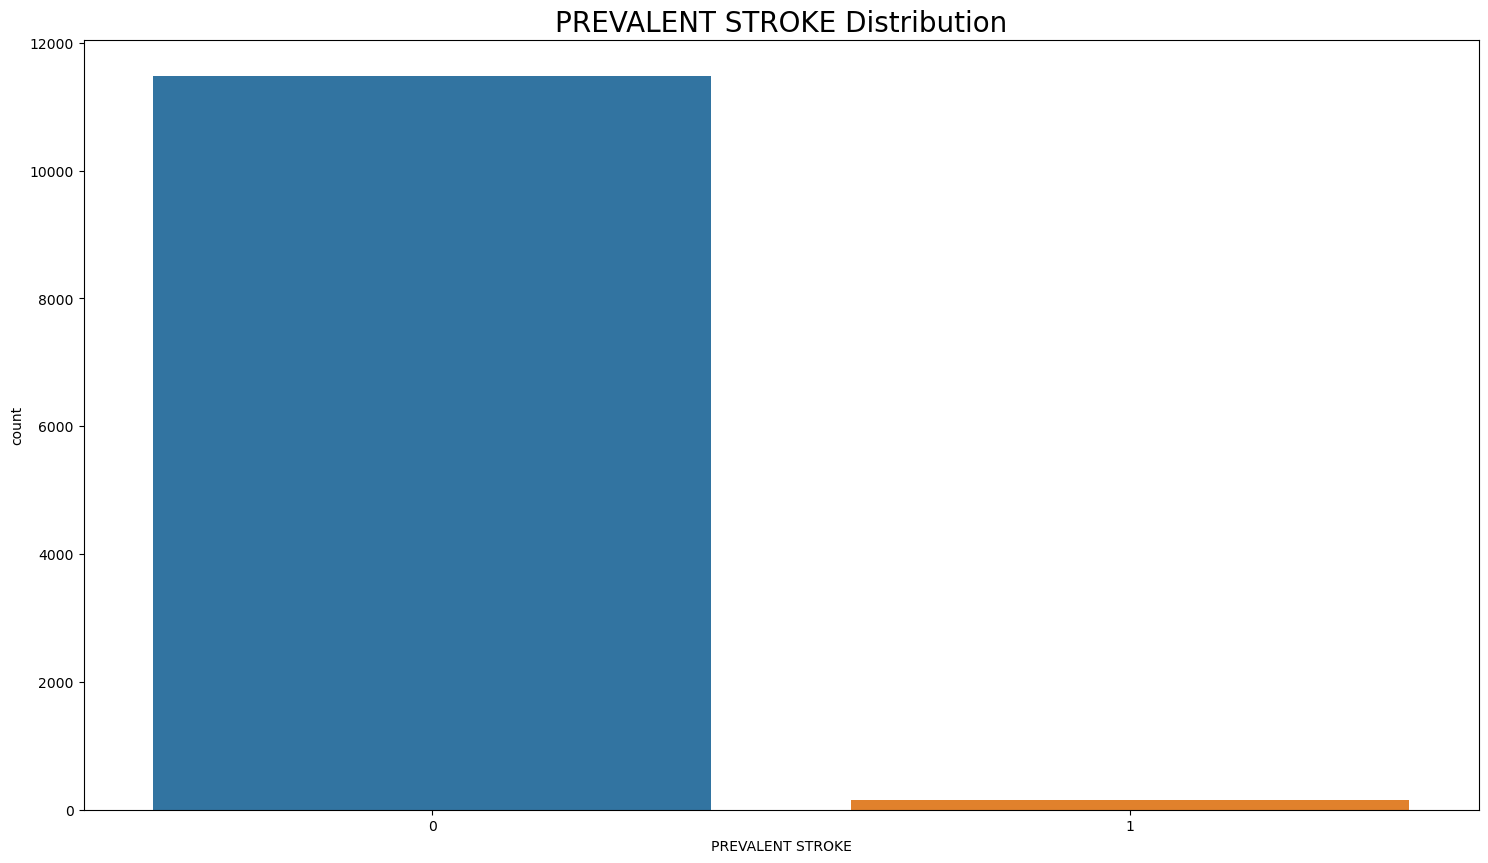

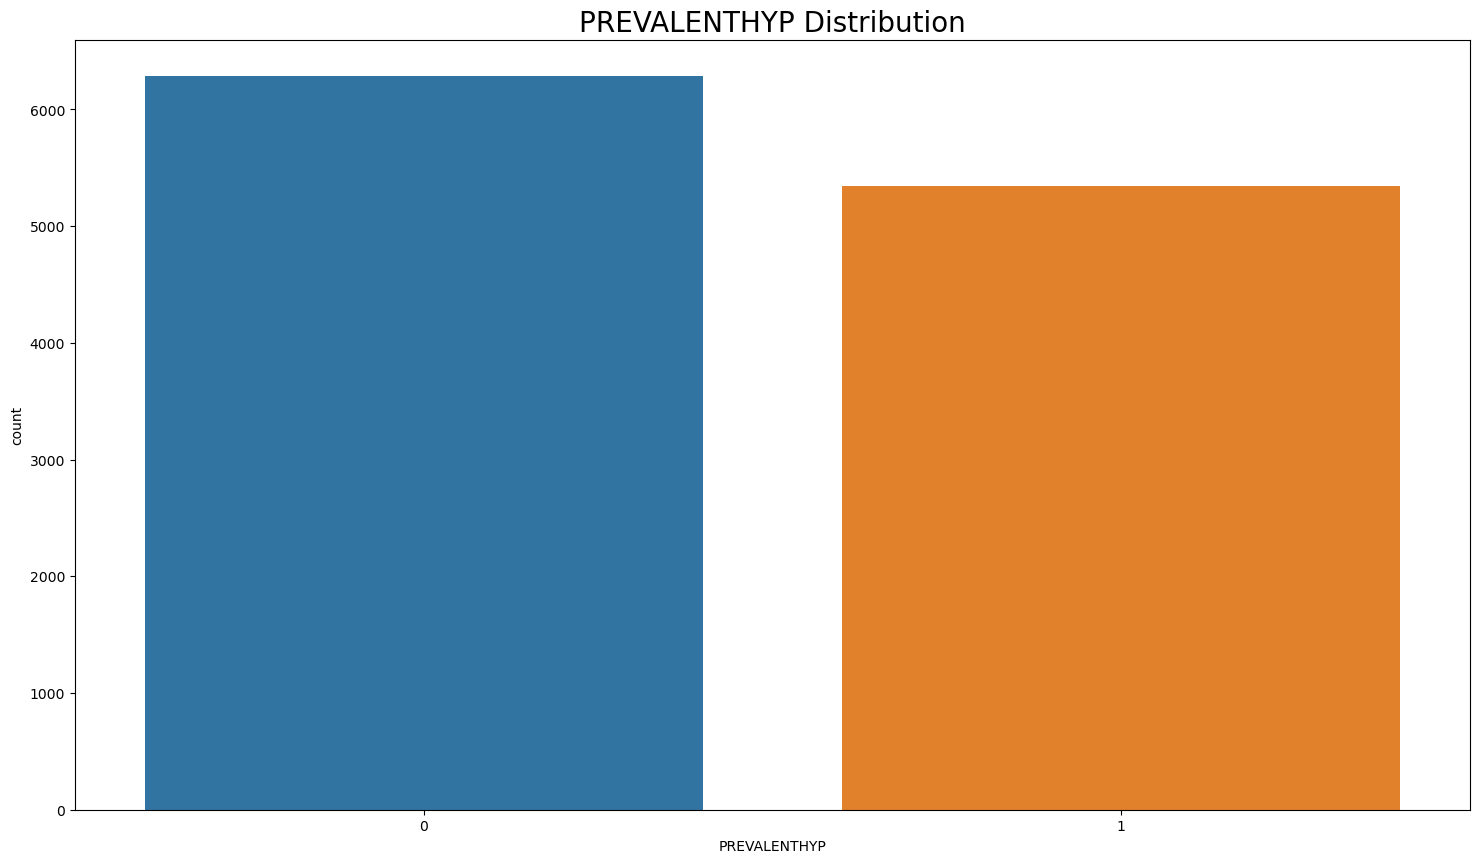

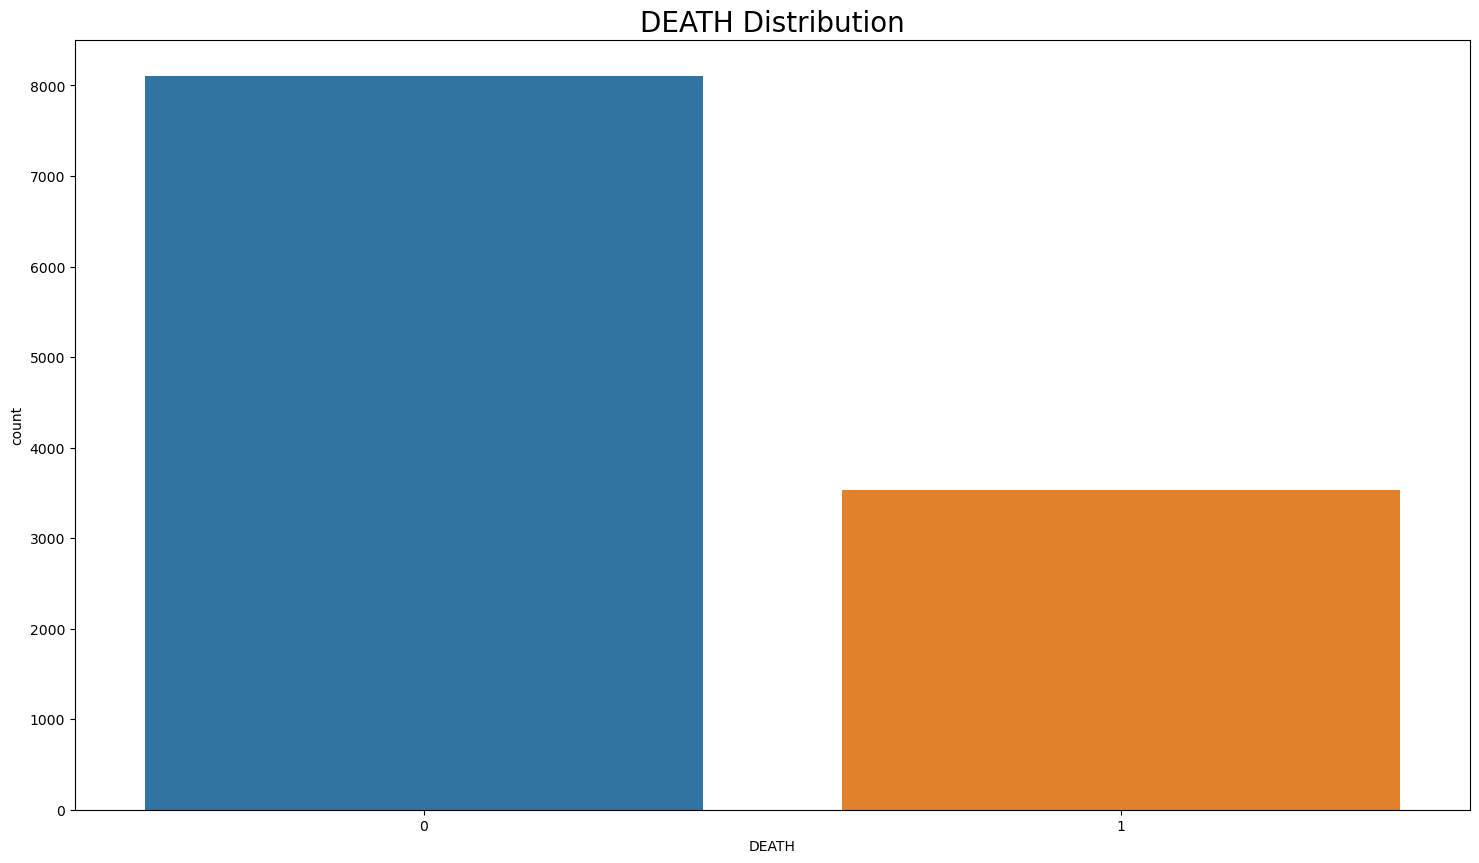

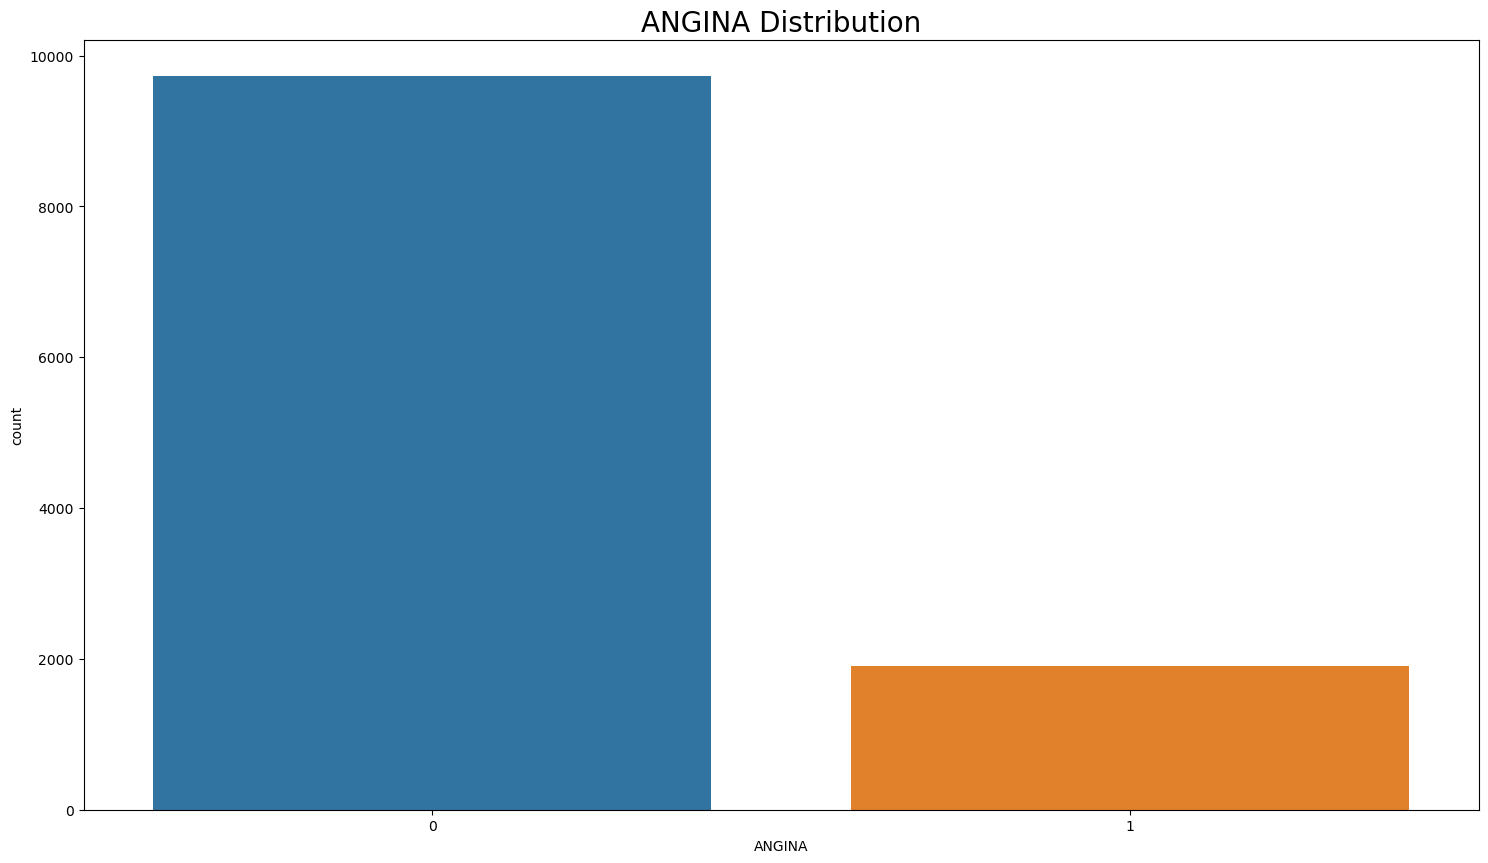

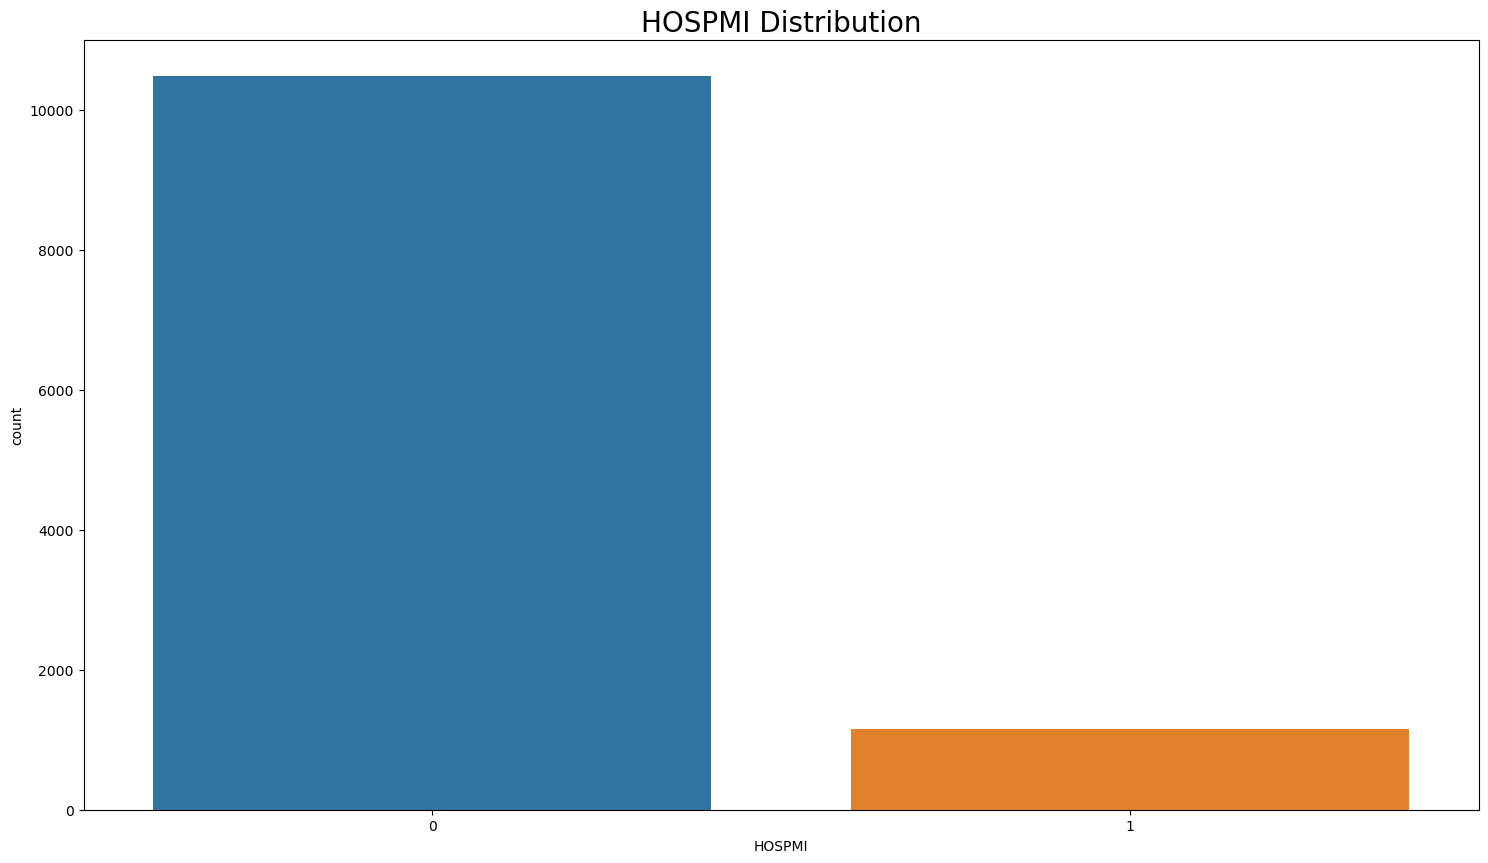

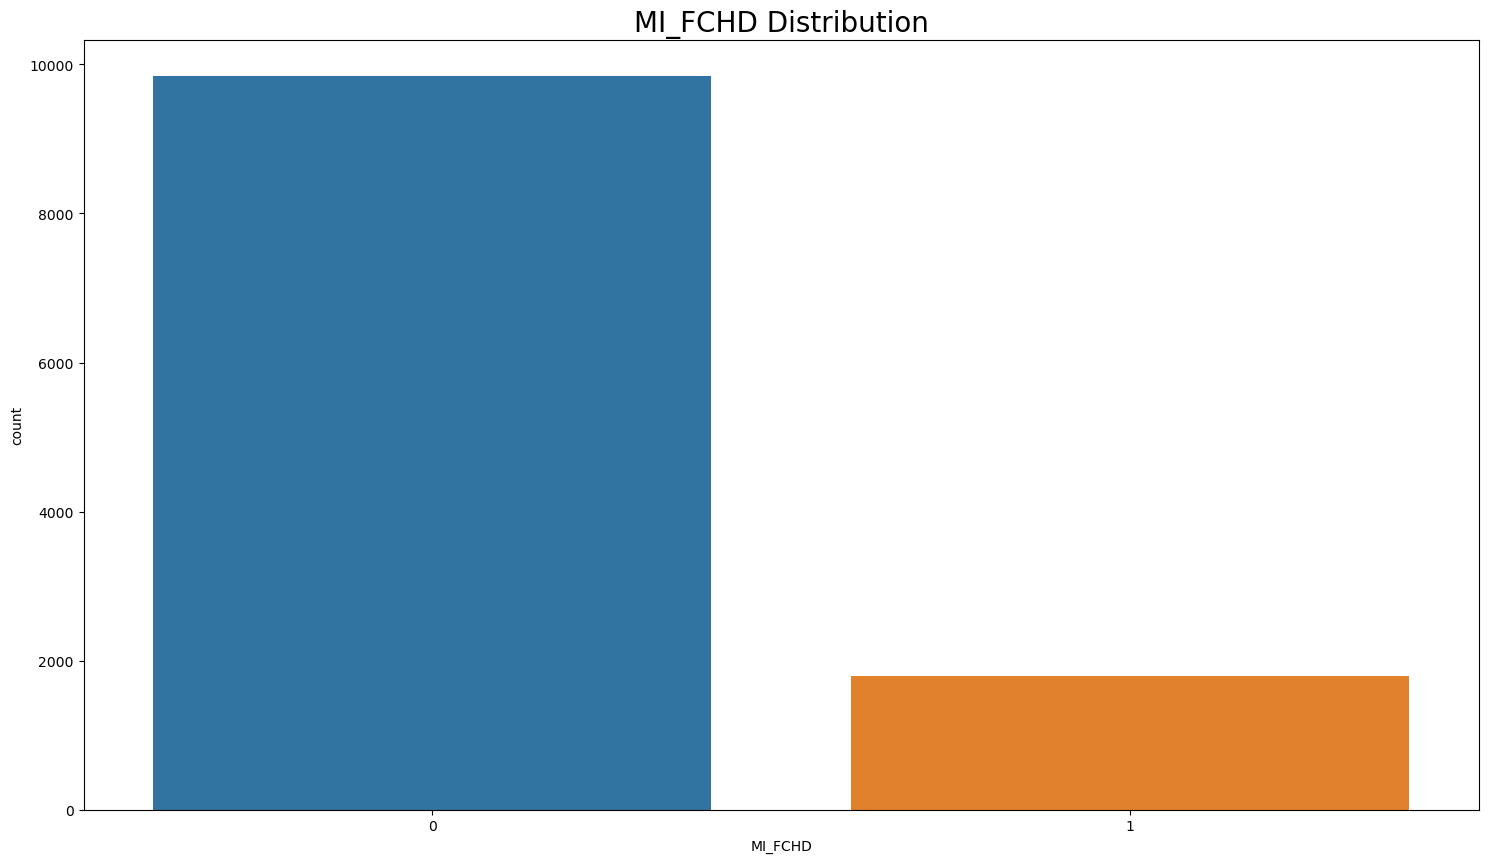

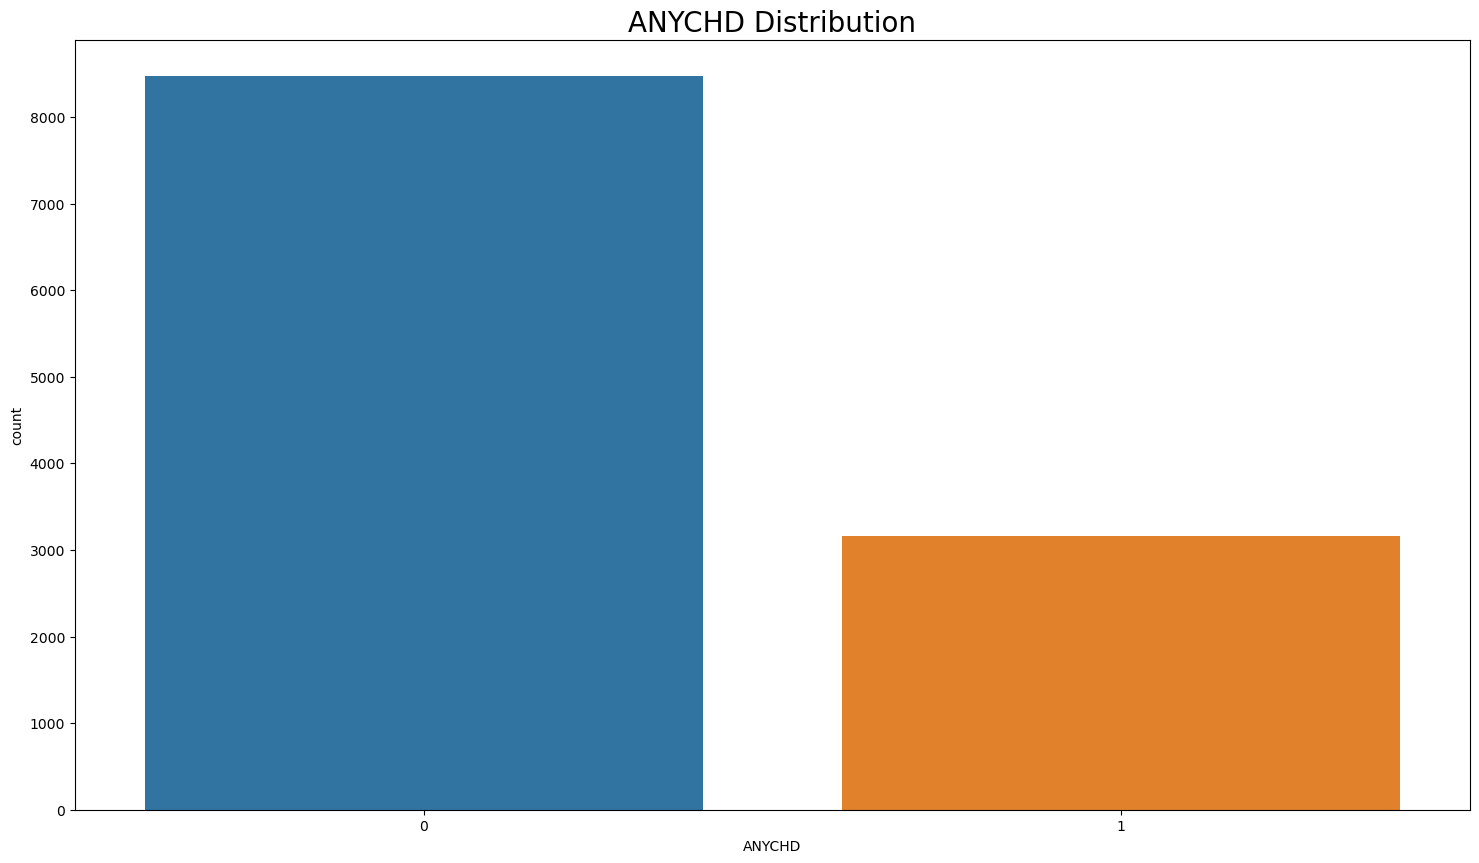

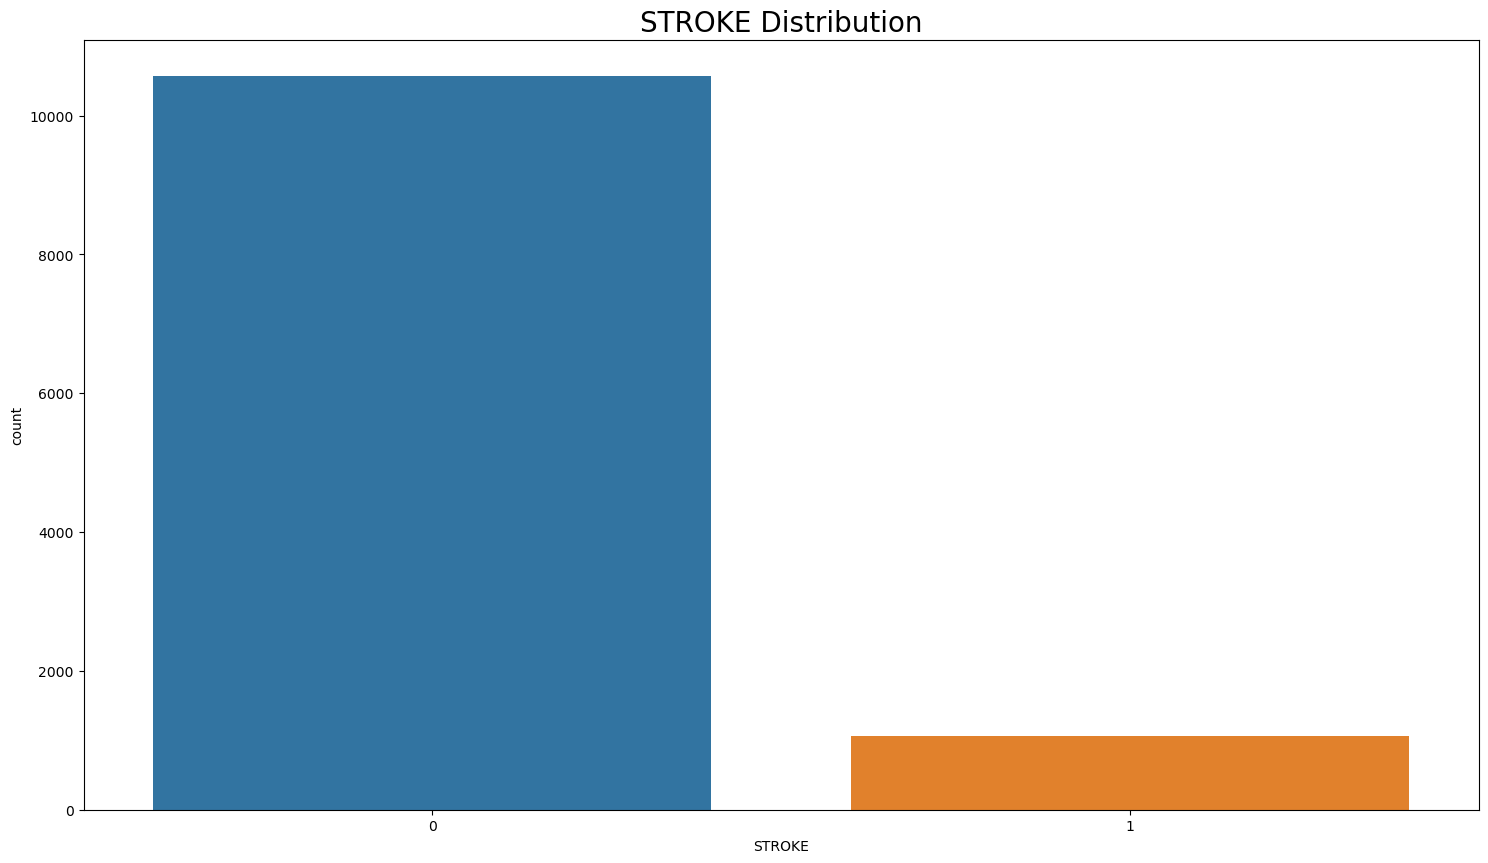

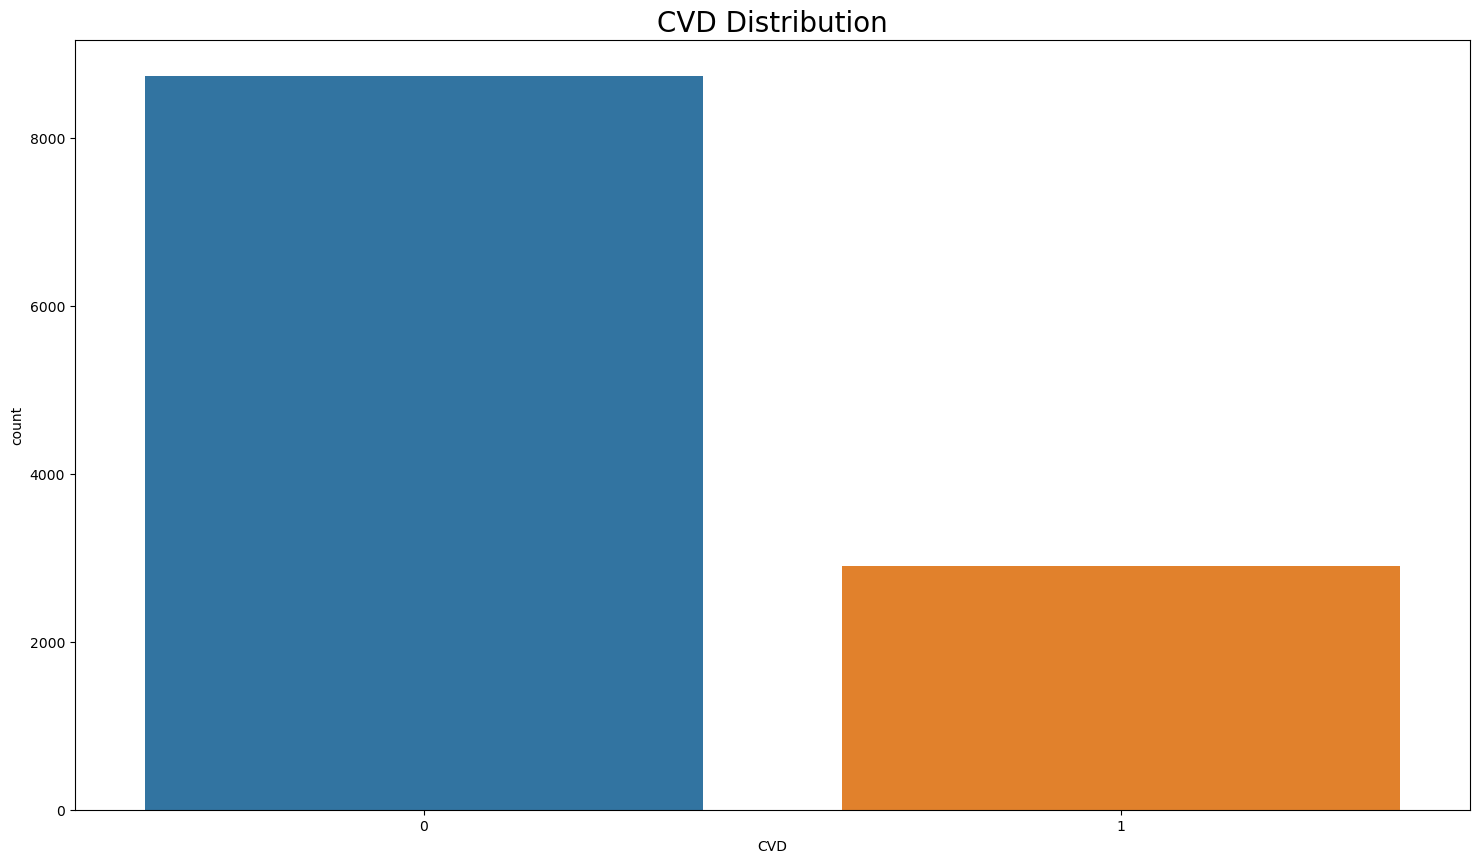

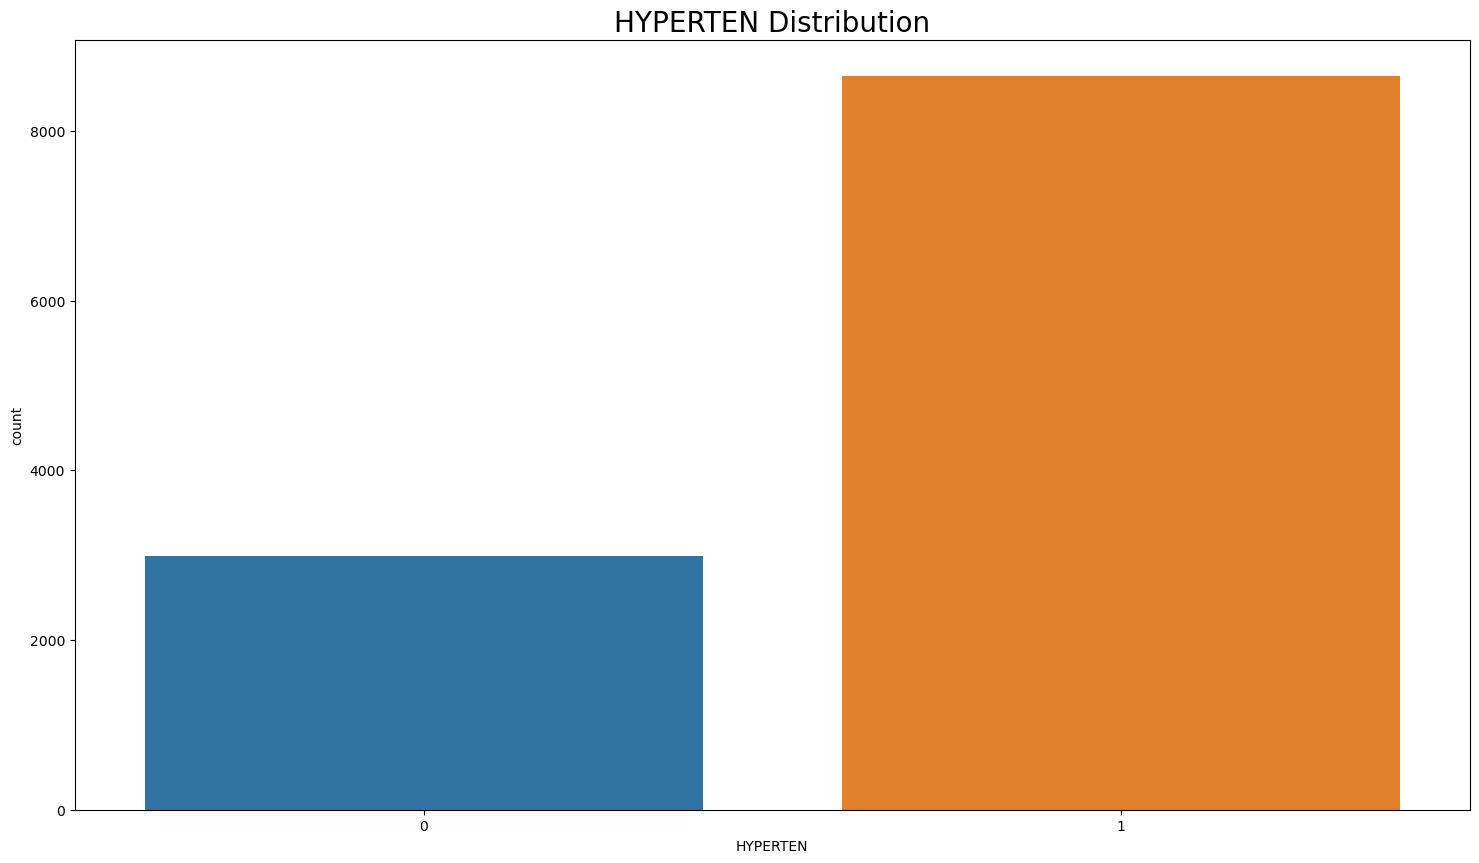

In [18]:
categorical_features = ['SEX', 'CURRENT SMOKER', 'DIABETES', 'BPMEDS', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVALENT STROKE', 'PREVALENTHYP', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN']
for feature in categorical_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.countplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [19]:
# Identify categorical columns. Assuming 'SEX' and 'educ' are categorical based on common sense or data dictionary
categorical_cols = ['SEX', 'EDUCATION']

# Apply one-hot encoding
df2 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows to verify the encoding
pd.set_option('display.max_columns', None)
df2.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,CURRENT SMOKER,CIGS PER DAY,BMI,DIABETES,BPMEDS,HEARTRATE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVALENT STROKE,PREVALENTHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,SEX_2,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0
0,2448,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,1,0.0,0.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
1,2448,209.0,52,121.0,66.0,0,0.0,0.00,0,0.0,69.0,92.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
2,6238,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,1,0.0,0.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
3,6238,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,0,0,0,0,0,2156,2,0.0,0.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
4,6238,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False


In [20]:
# Separate features (X) and target (y)
X = df2.drop('ANYCHD', axis=1)
y = df2['ANYCHD']

# Import and instantiate RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Print the shape of original and oversampled datasets
print("Original dataset shape:", X.shape, y.shape)
print("Oversampled dataset shape:", X_resampled.shape, y_resampled.shape)

Original dataset shape: (11627, 41) (11627,)
Oversampled dataset shape: (16938, 41) (16938,)


In [21]:
X.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,CURRENT SMOKER,CIGS PER DAY,BMI,DIABETES,BPMEDS,HEARTRATE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVALENT STROKE,PREVALENTHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,SEX_2,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0
0,2448,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,1,0.0,0.0,0,0,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
1,2448,209.0,52,121.0,66.0,0,0.0,0.00,0,0.0,69.0,92.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766,False,False,False,False,True
2,6238,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,1,0.0,0.0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
3,6238,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,0,0,0,0,0,2156,2,0.0,0.0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False
4,6238,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766,True,False,True,False,False


In [22]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: ANYCHD, dtype: int64

In [23]:
# SelectKBest with chi2 to calculate scores for all features
selector_all = SelectKBest(chi2, k='all')
selector_all.fit(X_resampled, y_resampled)

# Get the scores and feature names
feature_scores = pd.DataFrame({'Feature': X_resampled.columns, 'Score': selector_all.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Feature Importance Scores (Chi-squared) for all features:")
display(feature_scores)

Feature Importance Scores (Chi-squared) for all features:


,Feature,Score
0,RANDID,1.931932e+07
31,TIMECHD,1.046563e+07
28,TIMEAP,5.981004e+06
33,TIMECVD,5.000898e+06
35,TIMEHYP,4.026602e+06
30,TIMEMIFC,2.152731e+06
29,TIMEMI,1.719754e+06
32,TIMESTRK,5.225501e+05
34,TIMEDTH,3.842094e+05
17,TIME,1.044183e+04


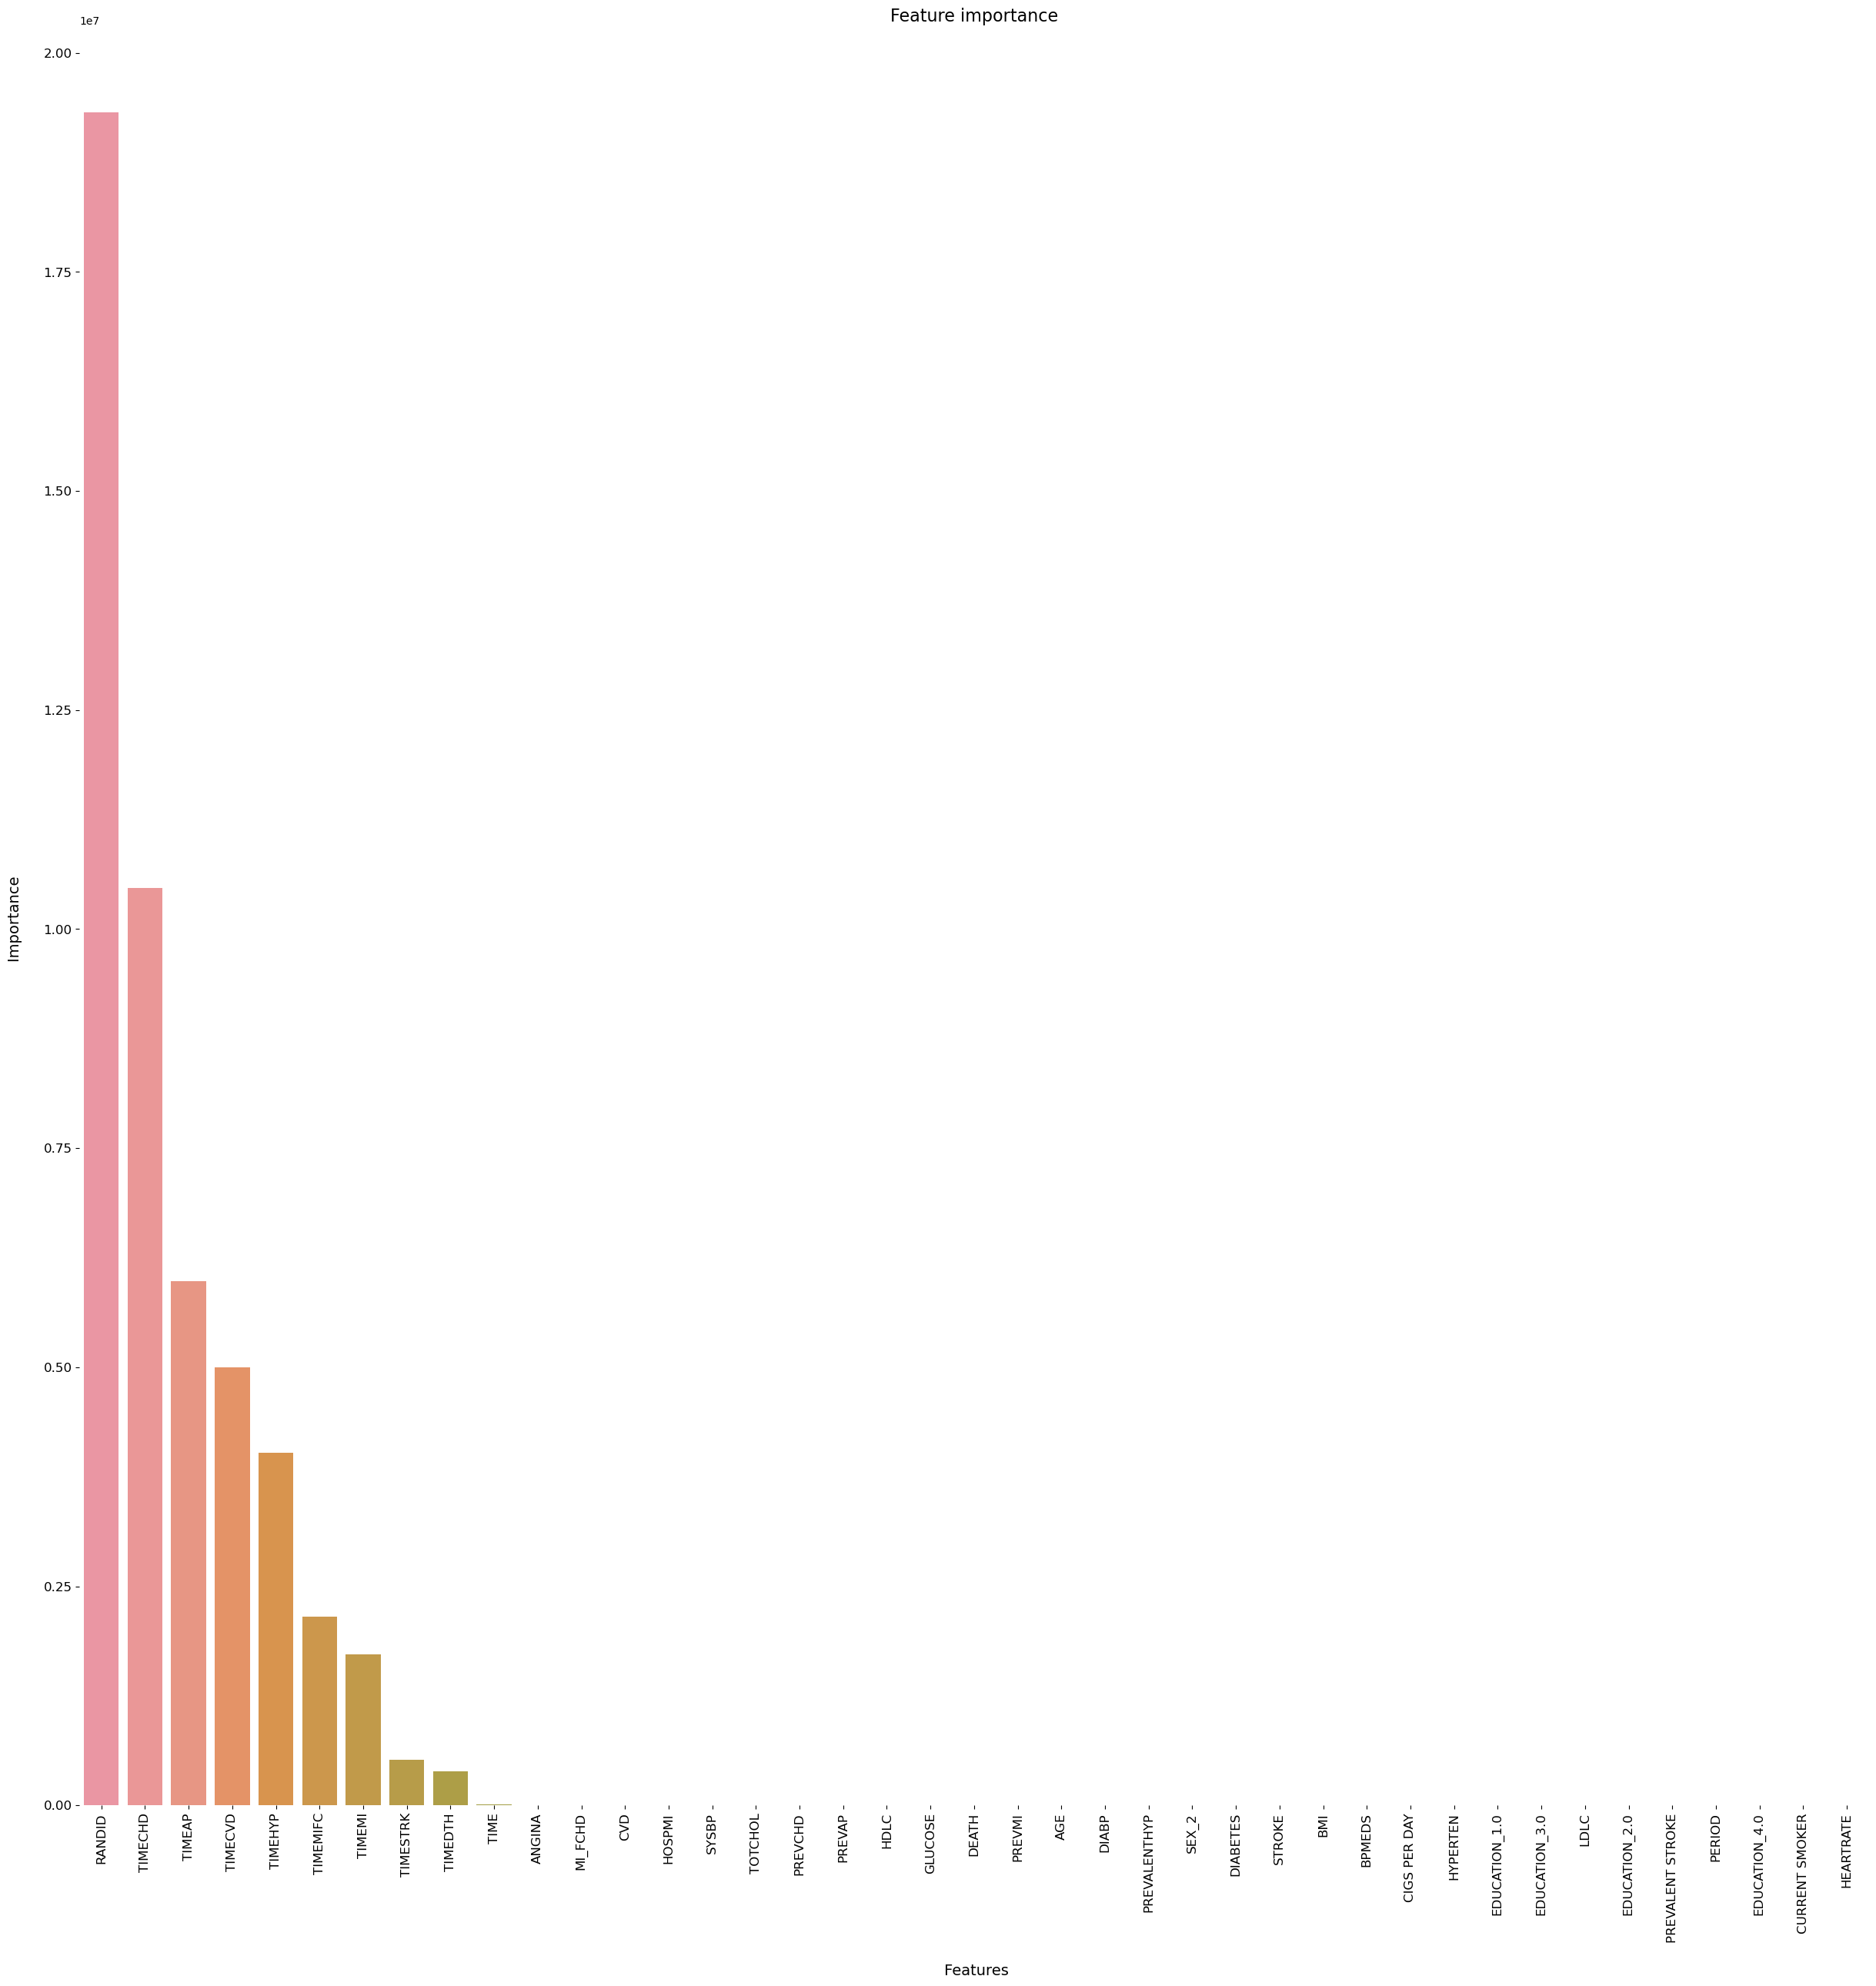

In [24]:
plt.figure(figsize=(30,30))
sns.barplot(x='Feature', y='Score', data=feature_scores)
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

In [25]:
X_selected = df2[["TIMEAP", "TIMEMI", "TIMEMIFC", "TIMECHD", "TIMESTRK", "TIMECVD", "TIMEDTH", "TIMEHYP", "AGE", "SYSBP", "PREVCHD", "PREVAP", "PREVMI", "PREVALENTHYP", "DEATH", "CVD", "ANGINA", "HOSPMI", "MI_FCHD", "ANYCHD"]]
X_selected.head()

,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP,AGE,SYSBP,PREVCHD,PREVAP,PREVMI,PREVALENTHYP,DEATH,CVD,ANGINA,HOSPMI,MI_FCHD,ANYCHD
0,8766,6438,6438,6438,8766,6438,8766,8766,39,106.0,0,0,0,0,0,1,0,1,1,1
1,8766,6438,6438,6438,8766,6438,8766,8766,52,121.0,0,0,0,0,0,1,0,1,1,1
2,8766,8766,8766,8766,8766,8766,8766,8766,46,121.0,0,0,0,0,0,0,0,0,0,0
3,8766,8766,8766,8766,8766,8766,8766,8766,52,105.0,0,0,0,0,0,0,0,0,0,0
4,8766,8766,8766,8766,8766,8766,8766,8766,58,108.0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Separate features (X) and target (y) from the resampled data
X_resampled_selected = X_resampled[["TIMEAP", "TIMEMI", "TIMEMIFC", "TIMECHD", "TIMESTRK", "TIMECVD", "TIMEDTH", "TIMEHYP", "AGE",  "SYSBP", "PREVCHD", "PREVAP", "PREVMI", "PREVALENTHYP", "DEATH", "CVD", "MI_FCHD", "ANGINA", "HOSPMI"]]
y_resampled_selected = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled_selected, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (13550, 19)
Shape of X_test: (3388, 19)
Shape of y_train: (13550,)
Shape of y_test: (3388,)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Class 0: 8469
Class 1: 8469
Proportion: 1.0 : 1


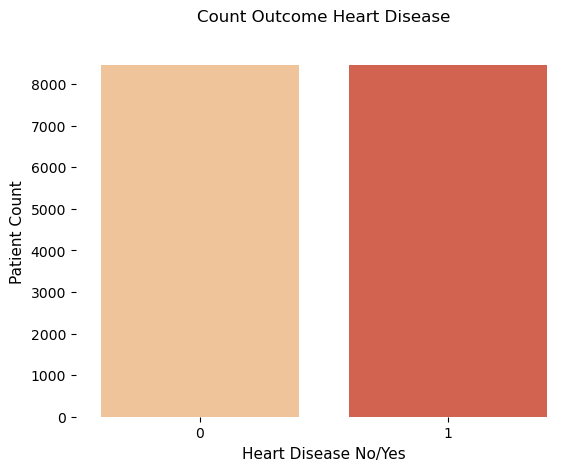

In [28]:
# Checking balance of outcome variable
target_count4 = y_resampled_selected.value_counts()
print('Class 0:', target_count4[0])
print('Class 1:', target_count4[1])
print('Proportion:', round(target_count4[0] / target_count4[1], 2), ': 1')

sns.countplot(y_resampled_selected, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [30]:
# Reshape data for RNN and LSTM (samples, time steps, features)
X_train_rnn_lstm = np.expand_dims(X_train_scaled, axis=1)
X_test_rnn_lstm = np.expand_dims(X_test_scaled, axis=1)

In [31]:
# LSTM
lstm_improved = Sequential([
    LSTM(64, input_shape=(X_train_rnn_lstm.shape[1], X_train_rnn_lstm.shape[2]), return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm_improved.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_improved.fit(X_train_rnn_lstm, y_train, epochs=15, batch_size=30, verbose=0)
y_pred_lstm_improved = (lstm_improved.predict(X_test_rnn_lstm) > 0.5).astype("int32")
lstm_improved_acc = accuracy_score(y_test, y_pred_lstm_improved)
print(f"Improved LSTM Accuracy: {lstm_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Improved LSTM Accuracy: 0.9994


In [32]:
# Hyperparameter grids for additional models

# RNN and LSTM - Example grids
# Tuning RNNs and LSTMs can involve parameters like the number of units,
# dropout, recurrent_dropout, etc.
param_grid_rnn_lstm = {
    'units': [32, 64],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive']
    # Add other relevant parameters like dropout, recurrent_dropout if needed
}

print("Hyperparameter grids for additional models defined.")

Hyperparameter grids for additional models defined.


In [34]:
# Define functions to create and compile the neural network models

def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(32, input_shape=(input_shape[1], input_shape[2])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Scale the features for neural network models on the entire selected dataset
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_resampled)

# Reshape the scaled data for Simple RNN and LSTM models
X_selected_rnn_lstm = np.expand_dims(X_selected_scaled, axis=1)

# Lists to store accuracy scores for each fold
lstm_accuracies = []

# Iterate through the splits and train/evaluate models
for fold, (train_index, test_index) in enumerate(skf.split(X_selected_scaled, y_resampled)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold_scaled, X_test_fold_scaled = X_selected_scaled[train_index], X_selected_scaled[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Reshape for RNN and LSTM
    X_train_fold_rnn_lstm = np.expand_dims(X_train_fold_scaled, axis=1)
    X_test_fold_rnn_lstm = np.expand_dims(X_test_fold_scaled, axis=1)

    # Train and evaluate LSTM
    lstm_model = create_lstm_model(X_train_fold_rnn_lstm.shape)
    lstm_model.fit(X_train_fold_rnn_lstm, y_train_fold, epochs=60, batch_size=50, verbose=0)
    _, lstm_accuracy = lstm_model.evaluate(X_test_fold_rnn_lstm, y_test_fold, verbose=0)
    lstm_accuracies.append(lstm_accuracy)


# Calculate average accuracies
avg_lstm_accuracy = np.mean(lstm_accuracies)

# Store average accuracies in tuned_model_accuracies dictionary
tuned_model_accuracies = {}
tuned_model_accuracies['LSTM Cross-Validation'] = avg_lstm_accuracy

# Print average cross-validation accuracies
print("\nAverage Cross-Validation Accuracies:")
print(f"LSTM: {avg_lstm_accuracy:.4f}")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average Cross-Validation Accuracies:
LSTM: 0.9999


In [122]:
from tensorflow.keras.layers import Input, LSTM, Dense, MultiHeadAttention, LayerNormalization, Dropout, Add
from tensorflow.keras.models import Model

# Define a simple Transformer block
def transformer_block(inputs, num_heads=2, ff_dim=32, dropout=0.1):
    # Multi-head self-attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))
    
    # Feed-forward network
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# Build a hybrid LSTM + Transformer model
def build_lstm_transformer(input_shape):
    inputs = Input(shape=input_shape[1:])
    x = LSTM(64, return_sequences=True)(inputs)
    x = transformer_block(x)
    x = LSTM(32)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the hybrid model
hybrid_model = build_lstm_transformer(X_train_rnn_lstm.shape)
hybrid_model.fit(X_train_rnn_lstm, y_train, epochs=60, batch_size=90, verbose=0)
y_pred_hybrid = (hybrid_model.predict(X_test_rnn_lstm) > 0.5).astype("int32")
hybrid_acc = accuracy_score(y_test, y_pred_hybrid)
print(f"Hybrid LSTM+Transformer Accuracy: {hybrid_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Hybrid LSTM+Transformer Accuracy: 0.9994


In [127]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Suggestions to improve/increase accuracy for the hybrid LSTM+Transformer model:

# 1. Increase model complexity (more layers/units)
# 2. Tune hyperparameters (batch size, epochs, learning rate, dropout)
# 3. Use regularization (dropout, L2)
# 4. Try different activation functions
# 5. Use early stopping and learning rate scheduling
# 6. Perform feature engineering/selection
# 7. Use more advanced data augmentation or ensemble methods

# Example: Increase LSTM units, add dropout, and train longer

def build_lstm_transformer_improved(input_shape):
    inputs = Input(shape=input_shape[1:])
    x = LSTM(128, return_sequences=True, dropout=0.2)(inputs)
    x = transformer_block(x, num_heads=4, ff_dim=64, dropout=0.2)
    x = LSTM(64, dropout=0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

hybrid_model_improved = build_lstm_transformer_improved(X_train_rnn_lstm.shape)
hybrid_model_improved.fit(
    X_train_rnn_lstm, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test_rnn_lstm, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=0
)
y_pred_hybrid_improved = (hybrid_model_improved.predict(X_test_rnn_lstm) > 0.5).astype("int32")
hybrid_improved_acc = accuracy_score(y_test, y_pred_hybrid_improved)
print(f"Improved Hybrid LSTM+Transformer Accuracy: {hybrid_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Improved Hybrid LSTM+Transformer Accuracy: 0.9885


In [45]:
# Reshape data for CNN (samples, time steps, features)
# For a 1D CNN, time steps would be the number of features, and features would be 1
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

print("Shape of X_train for CNN:", X_train_cnn.shape)
print("Shape of X_test for CNN:", X_test_cnn.shape)

Shape of X_train for CNN: (13550, 19, 1)
Shape of X_test for CNN: (3388, 19, 1)


In [47]:
# CNN
cnn_improved = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_improved.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_improved.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_cnn_improved = (cnn_improved.predict(X_test_cnn) > 0.5).astype("int32")
cnn_improved_acc = accuracy_score(y_test, y_pred_cnn_improved)
print(f"Improved CNN Accuracy: {cnn_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Improved CNN Accuracy: 0.9997


In [48]:
# CNN (1D CNN) - Example grid
# Tuning CNNs can involve parameters like the number of filters, kernel size,
# pooling size, etc.
param_grid_cnn = {
    'filters': [32, 64],
    'kernel_size': [2, 3, 5],
    'pool_size': [2],
    'learning_rate': ['constant', 'adaptive']
    # Add other relevant parameters if needed
}

print("Hyperparameter grids for additional models defined.")

Hyperparameter grids for additional models defined.


In [49]:
tuned_model_accuracies = {}

In [50]:
# Stratified K-Fold Cross-Validation for CNN model

cnn_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    # Prepare train and test sets for CNN (reshape for Conv1D)
    X_train_fold_cnn = np.expand_dims(X_train_scaled[train_index], axis=2)
    X_test_fold_cnn = np.expand_dims(X_train_scaled[test_index], axis=2)
    y_train_fold_cnn = y_train.iloc[train_index]
    y_test_fold_cnn = y_train.iloc[test_index]

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_fold_cnn.shape[1], X_train_fold_cnn.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    cnn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train CNN model
    cnn_model.fit(X_train_fold_cnn, y_train_fold_cnn, epochs=40, batch_size=20, verbose=0)

    # Evaluate CNN model
    _, cnn_accuracy = cnn_model.evaluate(X_test_fold_cnn, y_test_fold_cnn, verbose=0)
    cnn_accuracies.append(cnn_accuracy)

# Calculate average accuracy
avg_cnn_accuracy = np.mean(cnn_accuracies)
print(f"\nAverage CNN Cross-Validation Accuracy: {avg_cnn_accuracy:.4f}")

# Store in tuned_model_accuracies
tuned_model_accuracies['CNN Cross-Validation'] = avg_cnn_accuracy

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average CNN Cross-Validation Accuracy: 0.9984


In [60]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout, Add, Reshape
from tensorflow.keras.models import Model

# Define a simple Transformer block for CNN
def transformer_block_cnn(inputs, num_heads=2, ff_dim=32, dropout=0.1):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# Build hybrid CNN + Transformer model
def build_cnn_transformer(input_shape):
    inputs = Input(shape=input_shape[1:])
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=32, kernel_size=2, activation='relu')(x)
    # Transformer expects 3D input (batch, time, features)
    x = transformer_block_cnn(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, x)
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the hybrid CNN+Transformer model
cnn_transformer_model = build_cnn_transformer(X_train_cnn.shape)
cnn_transformer_model.fit(X_train_cnn, y_train, epochs=35, batch_size=60, verbose=0)
y_pred_cnn_transformer = (cnn_transformer_model.predict(X_test_cnn) > 0.5).astype("int32")
cnn_transformer_acc = accuracy_score(y_test, y_pred_cnn_transformer)
print(f"Hybrid CNN+Transformer Accuracy: {cnn_transformer_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Hybrid CNN+Transformer Accuracy: 1.0000


In [61]:
# RNN
rnn_improved = Sequential([
    SimpleRNN(64, input_shape=(X_train_rnn_lstm.shape[1], X_train_rnn_lstm.shape[2]), return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
rnn_improved.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_improved.fit(X_train_rnn_lstm, y_train, epochs=65, batch_size=85, verbose=0)
y_pred_rnn_improved = (rnn_improved.predict(X_test_rnn_lstm) > 0.5).astype("int32")
rnn_improved_acc = accuracy_score(y_test, y_pred_rnn_improved)
print(f"Improved RNN Accuracy: {rnn_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Improved RNN Accuracy: 0.9997


In [62]:
# RNN and LSTM - Example grids
# Tuning RNNs and LSTMs can involve parameters like the number of units,
# dropout, recurrent_dropout, etc.
param_grid_rnn_lstm = {
    'units': [32, 64],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive']
    # Add other relevant parameters like dropout, recurrent_dropout if needed
}

In [63]:
def create_simple_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(32, input_shape=(input_shape[1], input_shape[2])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Scale the features for neural network models on the entire selected dataset
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_resampled)

# Reshape the scaled data for Simple RNN and LSTM models
X_selected_rnn_lstm = np.expand_dims(X_selected_scaled, axis=1)

# Lists to store accuracy scores for each fold
rnn_accuracies = []

# Iterate through the splits and train/evaluate models
for fold, (train_index, test_index) in enumerate(skf.split(X_selected_scaled, y_resampled)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold_scaled, X_test_fold_scaled = X_selected_scaled[train_index], X_selected_scaled[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Reshape for RNN and LSTM
    X_train_fold_rnn_lstm = np.expand_dims(X_train_fold_scaled, axis=1)
    X_test_fold_rnn_lstm = np.expand_dims(X_test_fold_scaled, axis=1)

    # Train and evaluate Simple RNN
    rnn_model = create_simple_rnn_model(X_train_fold_rnn_lstm.shape)
    rnn_model.fit(X_train_fold_rnn_lstm, y_train_fold, epochs=65, batch_size=50, verbose=0)
    _, rnn_accuracy = rnn_model.evaluate(X_test_fold_rnn_lstm, y_test_fold, verbose=0)
    rnn_accuracies.append(rnn_accuracy)

# Calculate average accuracies
avg_rnn_accuracy = np.mean(rnn_accuracies)

# Store average accuracies in tuned_model_accuracies dictionary
tuned_model_accuracies['Simple RNN Cross-Validation'] = avg_rnn_accuracy

# Print average cross-validation accuracies
print("\nAverage Cross-Validation Accuracies:")
print(f"Simple RNN: {avg_rnn_accuracy:.4f}")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average Cross-Validation Accuracies:
Simple RNN: 0.9999


In [112]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, MultiHeadAttention, LayerNormalization, Dropout, Add
from tensorflow.keras.models import Model

# Define a simple Transformer block for RNN
def transformer_block_rnn(inputs, num_heads=2, ff_dim=32, dropout=0.1):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# Build hybrid RNN + Transformer model
def build_rnn_transformer(input_shape):
    inputs = Input(shape=input_shape[1:])
    x = SimpleRNN(64, return_sequences=True)(inputs)
    x = transformer_block_rnn(x)
    x = SimpleRNN(32)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, x)
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the hybrid RNN+Transformer model
rnn_transformer_model = build_rnn_transformer(X_train_rnn_lstm.shape)
rnn_transformer_model.fit(X_train_rnn_lstm, y_train, epochs=80, batch_size=90, verbose=0)
y_pred_rnn_transformer = (rnn_transformer_model.predict(X_test_rnn_lstm) > 0.5).astype("int32")
rnn_transformer_acc = accuracy_score(y_test, y_pred_rnn_transformer)
print(f"Hybrid RNN+Transformer Accuracy: {rnn_transformer_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Hybrid RNN+Transformer Accuracy: 0.9988


In [75]:
# MLP
mlp= Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=0)
y_pred_mlp_prob = (mlp.predict(X_test_scaled) > 0.5).astype("int32")
mlp_improved_acc = accuracy_score(y_test, y_pred_mlp_prob)
print(f"MLP Accuracy: {mlp_improved_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MLP Accuracy: 0.9997


In [76]:
# MLP (Neural Network) - Example grid
# Hyperparameters for deep learning models are often more complex and might involve
# tuning the number of layers, number of neurons per layer, activation functions, etc.
param_grid_mlp = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [77]:
# Define functions to create and compile the neural network models
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Scale the features for neural network models on the entire selected dataset
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_resampled)

# Reshape the scaled data for Simple RNN and LSTM models
X_selected_rnn_lstm = np.expand_dims(X_selected_scaled, axis=1)

# Lists to store accuracy scores for each fold
mlp_accuracies = []

# Iterate through the splits and train/evaluate models
for fold, (train_index, test_index) in enumerate(skf.split(X_selected_scaled, y_resampled)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold_scaled, X_test_fold_scaled = X_selected_scaled[train_index], X_selected_scaled[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Reshape for RNN and LSTM
    X_train_fold_rnn_lstm = np.expand_dims(X_train_fold_scaled, axis=1)
    X_test_fold_rnn_lstm = np.expand_dims(X_test_fold_scaled, axis=1)

    # Train and evaluate MLP
    mlp_model = create_mlp_model(X_train_fold_scaled.shape[1])
    mlp_model.fit(X_train_fold_scaled, y_train_fold, epochs=60, batch_size=50, verbose=0)
    _, mlp_accuracy = mlp_model.evaluate(X_test_fold_scaled, y_test_fold, verbose=0)
    mlp_accuracies.append(mlp_accuracy)


# Calculate average accuracies
avg_mlp_accuracy = np.mean(mlp_accuracies)

# Store average accuracies in tuned_model_accuracies dictionary
tuned_model_accuracies['MLP Cross-Validation'] = avg_mlp_accuracy

# Print average cross-validation accuracies
print("\nAverage Cross-Validation Accuracies:")
print(f"MLP: {avg_mlp_accuracy:.4f}")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

Average Cross-Validation Accuracies:
MLP: 0.9998


In [104]:
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Add, Flatten
from tensorflow.keras.models import Model

def transformer_block_mlp(inputs, num_heads=2, ff_dim=64, dropout=0.1):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))
    return out2

# Reshape input for transformer (batch, time, features) - treat features as time steps
X_train_mlp_transformer = np.expand_dims(X_train_scaled, axis=1)
X_test_mlp_transformer = np.expand_dims(X_test_scaled, axis=1)

input_shape = X_train_mlp_transformer.shape[1:]

inputs = Input(shape=input_shape)
x = transformer_block_mlp(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
mlp_transformer_model = Model(inputs, outputs)
mlp_transformer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_transformer_model.fit(X_train_mlp_transformer, y_train, epochs=100, batch_size=90, verbose=0)
y_pred_mlp_transformer = (mlp_transformer_model.predict(X_test_mlp_transformer) > 0.5).astype("int32")
mlp_transformer_acc = accuracy_score(y_test, y_pred_mlp_transformer)
print(f"MLP+Transformer Accuracy: {mlp_transformer_acc:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MLP+Transformer Accuracy: 0.9997
